# Explore Icesat over channel, cycle 6

The last notebook looked at cycle 3 v 5, this one 3 v 6

In [1]:


import rasterio as rio
import rasterio.mask
import fiona
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import os
import sys
import glob
import matplotlib.pyplot as plt
from scipy import interpolate
import xarray as xr
from shapely.geometry import Point
from shapely.geometry import LineString
import hvplot.xarray  # noqa
import cartopy.crs as crs
import hvplot.pandas


In [2]:
path = "/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ds_subset_kamb_20200404.nc"


In [3]:
ds = xr.open_dataset(path, engine="h5netcdf")

In [4]:
# convert to pandas dataframe
dd = ds.drop_dims(['poly_exponent_x','poly_exponent_y'])
df = dd.to_dataframe()
df.reset_index(inplace=True)
df.keys()

Index(['cycle_number', 'ref_pt', 'at_slope', 'complex_surface_flag',
       'curvature', 'deg_x', 'deg_y', 'delta_time', 'dem_h', 'e_slope',
       'h_corr', 'h_corr_sigma', 'h_corr_sigma_systematic', 'latitude',
       'longitude', 'misfit_RMS', 'misfit_chi2r', 'n_slope',
       'quality_summary_corrected_h', 'quality_summary_ref_surf',
       'rgt_azimuth', 'slope_change_rate_x', 'slope_change_rate_x_sigma',
       'slope_change_rate_y', 'slope_change_rate_y_sigma', 'utc_time', 'x',
       'x_atc', 'xt_slope', 'y', 'y_atc'],
      dtype='object')

In [5]:
df = ds[["h_corr", "utc_time","h_corr_sigma"]].to_dataframe().reset_index()
df

cycle_number   ref_pt  h_corr utc_time  h_corr_sigma              x  \
0                  1  1544442     NaN      NaT           NaN -389988.100874   
1                  1  1544445     NaN      NaT           NaN -390001.349455   
2                  1  1544448     NaN      NaT           NaN -390014.605616   
3                  1  1544451     NaN      NaT           NaN -390027.889913   
4                  1  1544454     NaN      NaT           NaN -390041.659490   
...              ...      ...     ...      ...           ...            ...   
265610             7  1464678     NaN      NaT           NaN -388975.495203   
265611             7  1464681     NaN      NaT           NaN -388934.233161   
265612             7  1464684     NaN      NaT           NaN -388892.972333   
265613             7  1464687     NaN      NaT           NaN -388851.371993   
265614             7  1464690     NaN      NaT           NaN -388809.770835   

                    y  
0      -700200.620290  
1      -700257.397780  
2      -700314.173577  
3      -700370.942816  
4      -700427.598519  
...               ...  
265610 -699729.113947  
265611 -699687.906877  
265612 -699646.698328  
265613 -699605.835379  
265614 -699564.973641  

[265615 rows x 7 columns]

In [6]:
dh = (ds.sel(cycle_number=5).h_corr-ds.sel(cycle_number=3).h_corr).to_dataframe()


In [7]:
line_name='line7'
gdf_line7 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
# study_area = gpd.read_file('/Users/home/whitefar/DATA/FIELD_ANT_19/PRE_FIELD/KISRoutes/study_area_buffer.shp')
line_name='line6'
gdf_line6 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
# study_area = gpd.read_file('/Users/home/whitefar/DATA/FIELD_ANT_19/PRE_FIELD/KISRoutes/study_area_buffer.shp')
line_name='line5'
gdf_line5 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
# study_area = gpd.read_file('/Users/home/whitefar/DATA/FIELD_ANT_19/PRE_FIELD/KISRoutes/study_area_buffer.shp')
line_name='line4'
gdf_line4 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")

line_name='line3'
gdf_line3 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
line_name='line2'
gdf_line2 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
line_name='line1'
gdf_line1 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")

line_name='line0'
gdf_line0 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")

### Plot the data in the area to see which cycles have more relevant data

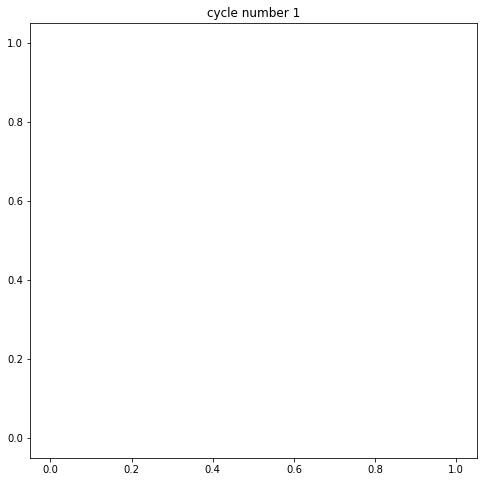

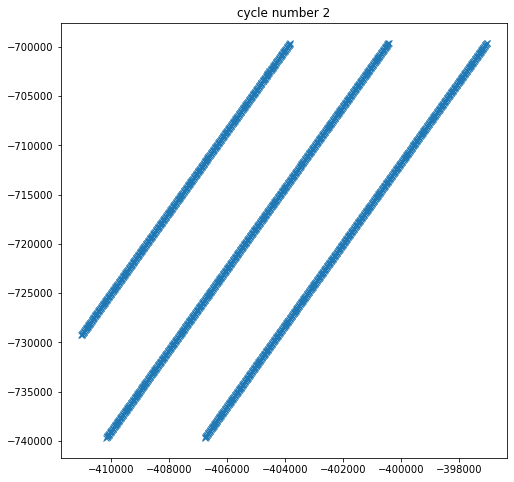

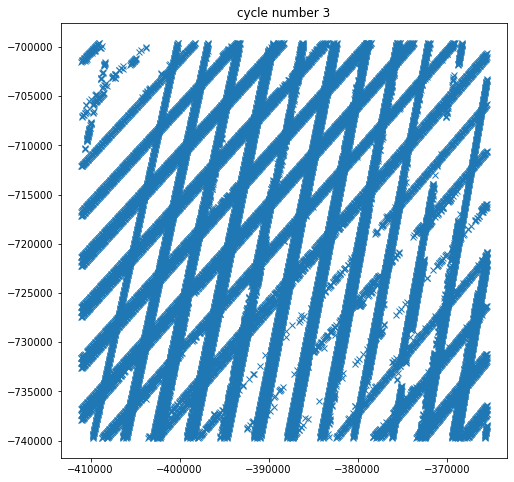

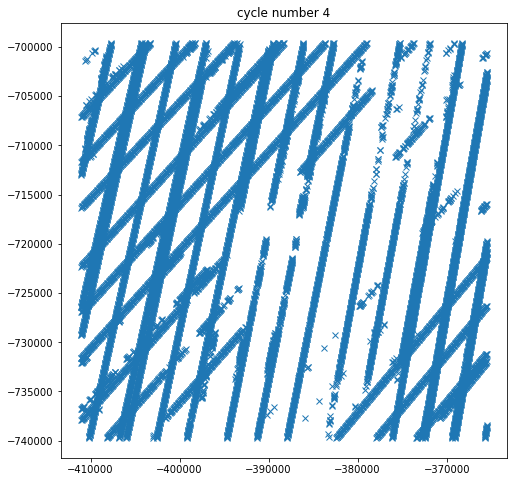

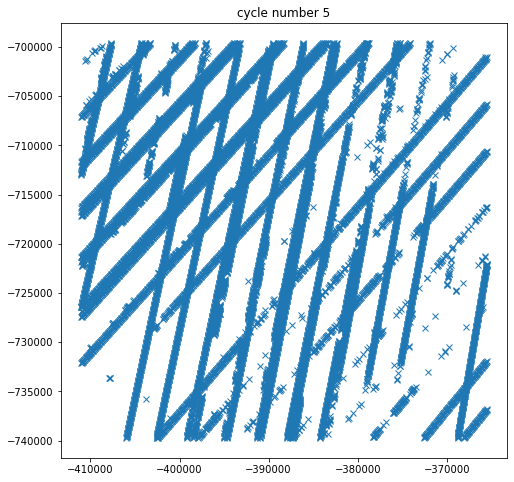

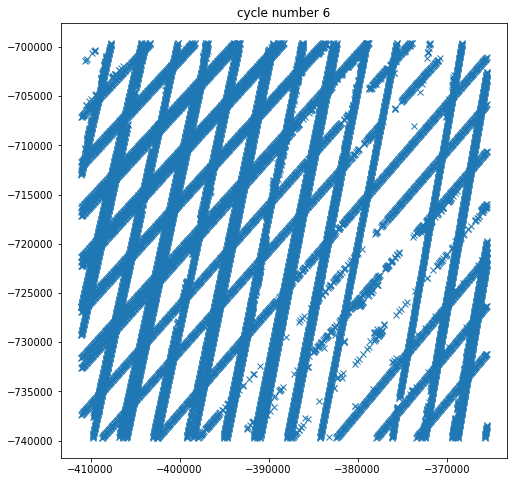

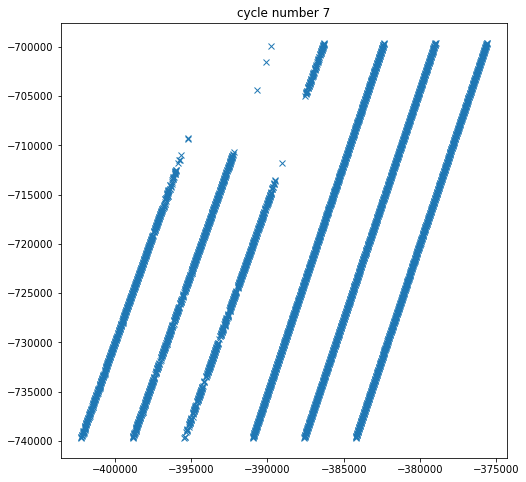

In [8]:
for cycle_number in range(1,8):

    plt.figure(figsize=(8,8))
    plt.plot(df[df.cycle_number==cycle_number].dropna().x,df[df.cycle_number==cycle_number].dropna().y,'x')
    plt.title(f"cycle number {cycle_number}")

### As above but with radar lines 5-7 for reference

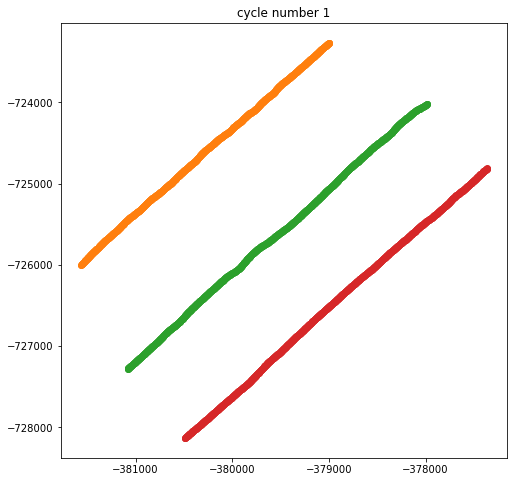

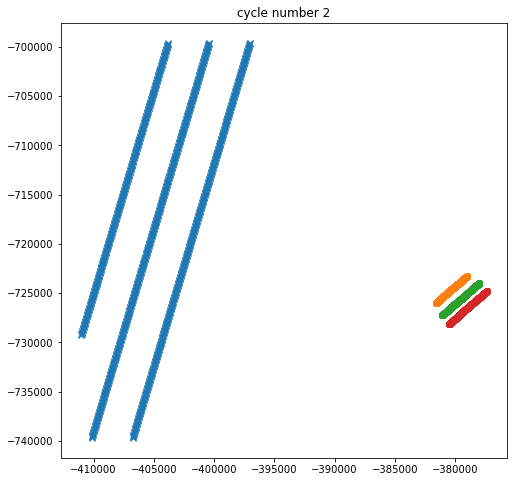

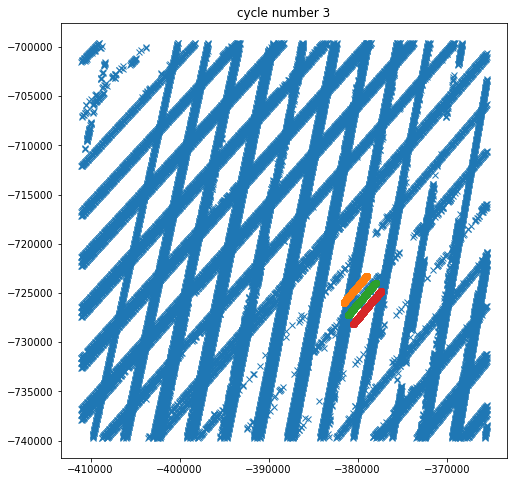

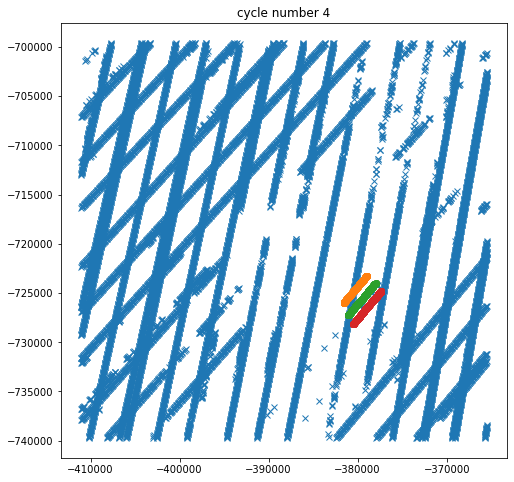

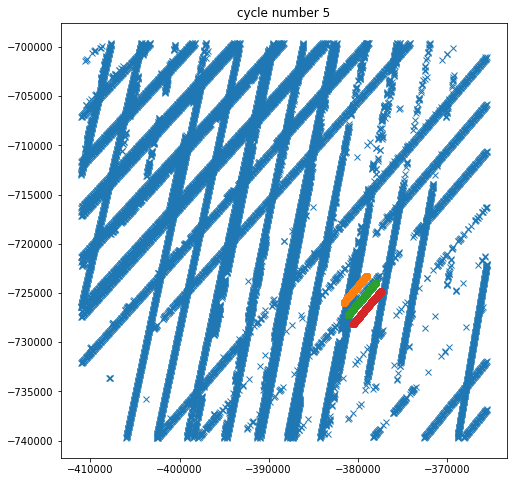

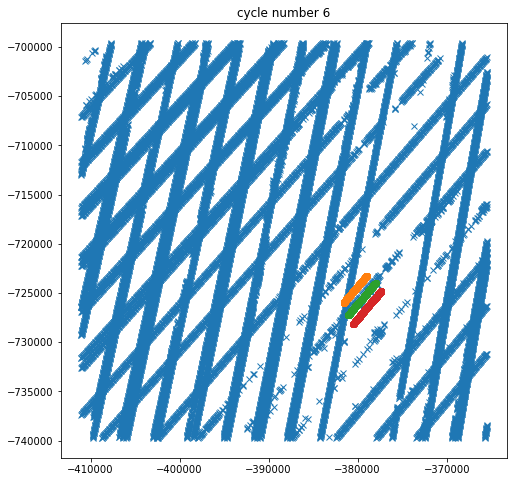

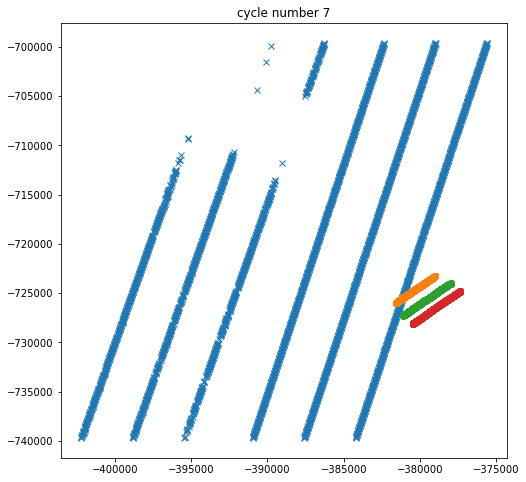

In [9]:
for cycle_number in range(1,8):

    plt.figure(figsize=(8,8))
    plt.plot(df[df.cycle_number==cycle_number].dropna().x,df[df.cycle_number==cycle_number].dropna().y,'x')
    plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,'o')
    plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,'o')
    plt.plot(gdf_line5.geometry.x,gdf_line5.geometry.y,'o')
    
    plt.title(f"cycle number {cycle_number}")

In [10]:
#do a difference of icesat near line 6, between cycle 5 and 3
dh_cycle63 = (ds.sel(cycle_number=6).h_corr-ds.sel(cycle_number=3).h_corr).to_dataframe()
dh_corr_sigma = (ds.sel(cycle_number=6).h_corr_sigma+ds.sel(cycle_number=3).h_corr_sigma).to_dataframe()
dh_cycle63['h_corr_sigma']= dh_corr_sigma.h_corr_sigma
dh_cycle63 = dh_cycle63.dropna()

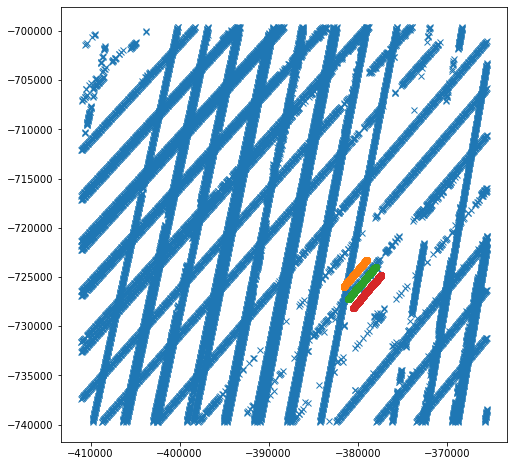

In [12]:
plt.figure(figsize=(8,8))
plt.plot(dh_cycle63.x,dh_cycle63.y,'x')
plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,'o')
plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,'o')
plt.plot(gdf_line5.geometry.x,gdf_line5.geometry.y,'o')

Similar coverage to line 5

In [13]:
line6 = LineString(gdf_line6.geometry.tolist())

In [42]:
cycle_number=3
df_cycle3 = df[df.cycle_number==cycle_number]
points = [Point(xy) for xy in zip(df_cycle3.x,df_cycle3.y)]
gdf_cycle3 = gpd.GeoDataFrame(df_cycle3,geometry=points)
gdf_cycle3['intersects_line6'] = gdf_cycle3.geometry.intersects(line6.buffer(300))
near_3 = gdf_cycle3[df_cycle3.intersects_line6==True]

In [43]:
cycle_number=6
df_cycle6 = df[df.cycle_number==cycle_number]
points = [Point(xy) for xy in zip(df_cycle6.x,df_cycle5.y)]
gdf_cycle6 = gpd.GeoDataFrame(df_cycle6,geometry=points)
gdf_cycle6['intersects_line6'] = gdf_cycle6.geometry.intersects(line6.buffer(300))
near_6 = gdf_cycle6[gdf_cycle6.intersects_line6==True]

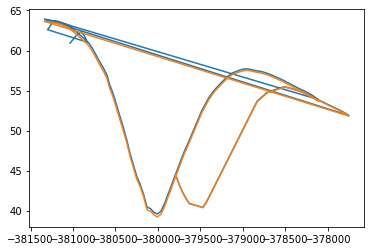

In [44]:
plt.plot(near_3.x,near_3.h_corr)
plt.plot(near_6.x,near_6.h_corr)

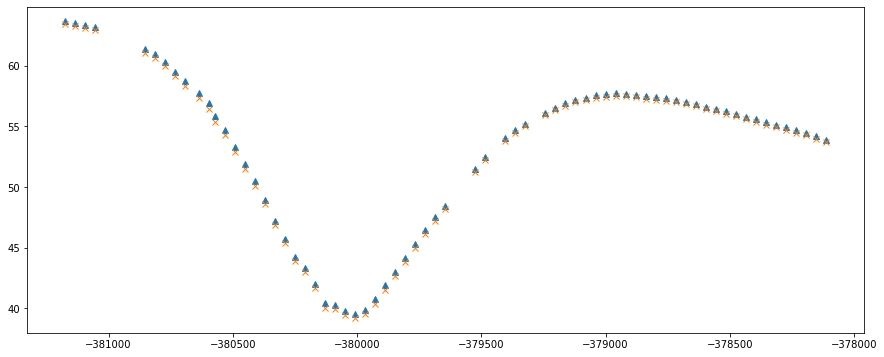

In [62]:
plt.figure(figsize=(15,6))
ff3=20
tt3=-26
plt.plot(near_3.x.iloc[ff3:tt3],near_3.h_corr.iloc[ff3:tt3],'^')
plt.plot(near_6.x.iloc[20:],near_6.h_corr.iloc[20:],'x')

In [87]:
near6_3=near_3.iloc[ff3:tt3]
near6_6=near_6.iloc[20:-25]

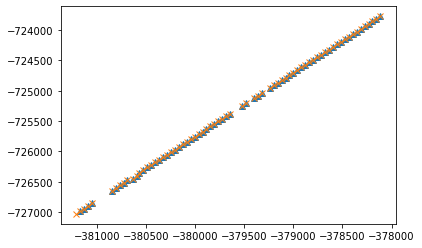

In [88]:
plt.plot(near6_3.x,near6_3.y,'^')
plt.plot(near6_6.x,near6_6.y,'x')

In [89]:
points = [Point(xy) for xy in zip(dh_cycle63.x,dh_cycle63.y)]
gdh_cycle63 = gpd.GeoDataFrame(dh_cycle63,geometry=points)

In [90]:
gdh_cycle63['intersects_line6'] = gdh_cycle63.geometry.intersects(line6.buffer(300))
dh_near_line6 = gdh_cycle63[gdh_cycle63.intersects_line6==True].iloc[20:]
# dh_near_line6

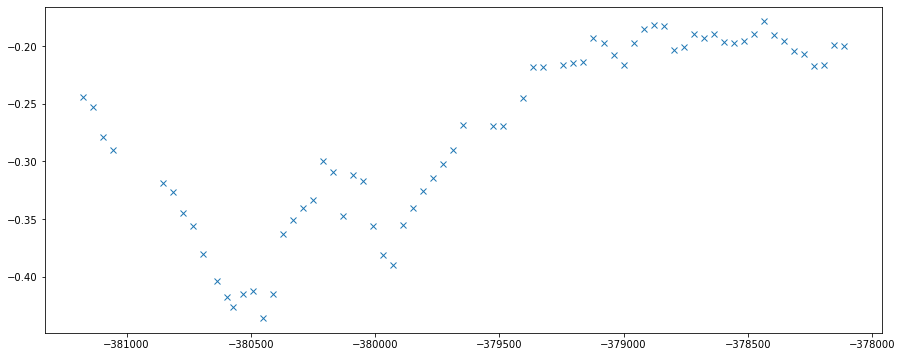

In [91]:
plt.figure(figsize=(15,6))
plt.plot(dh_near_line6.x,dh_near_line6.h_corr,'x')

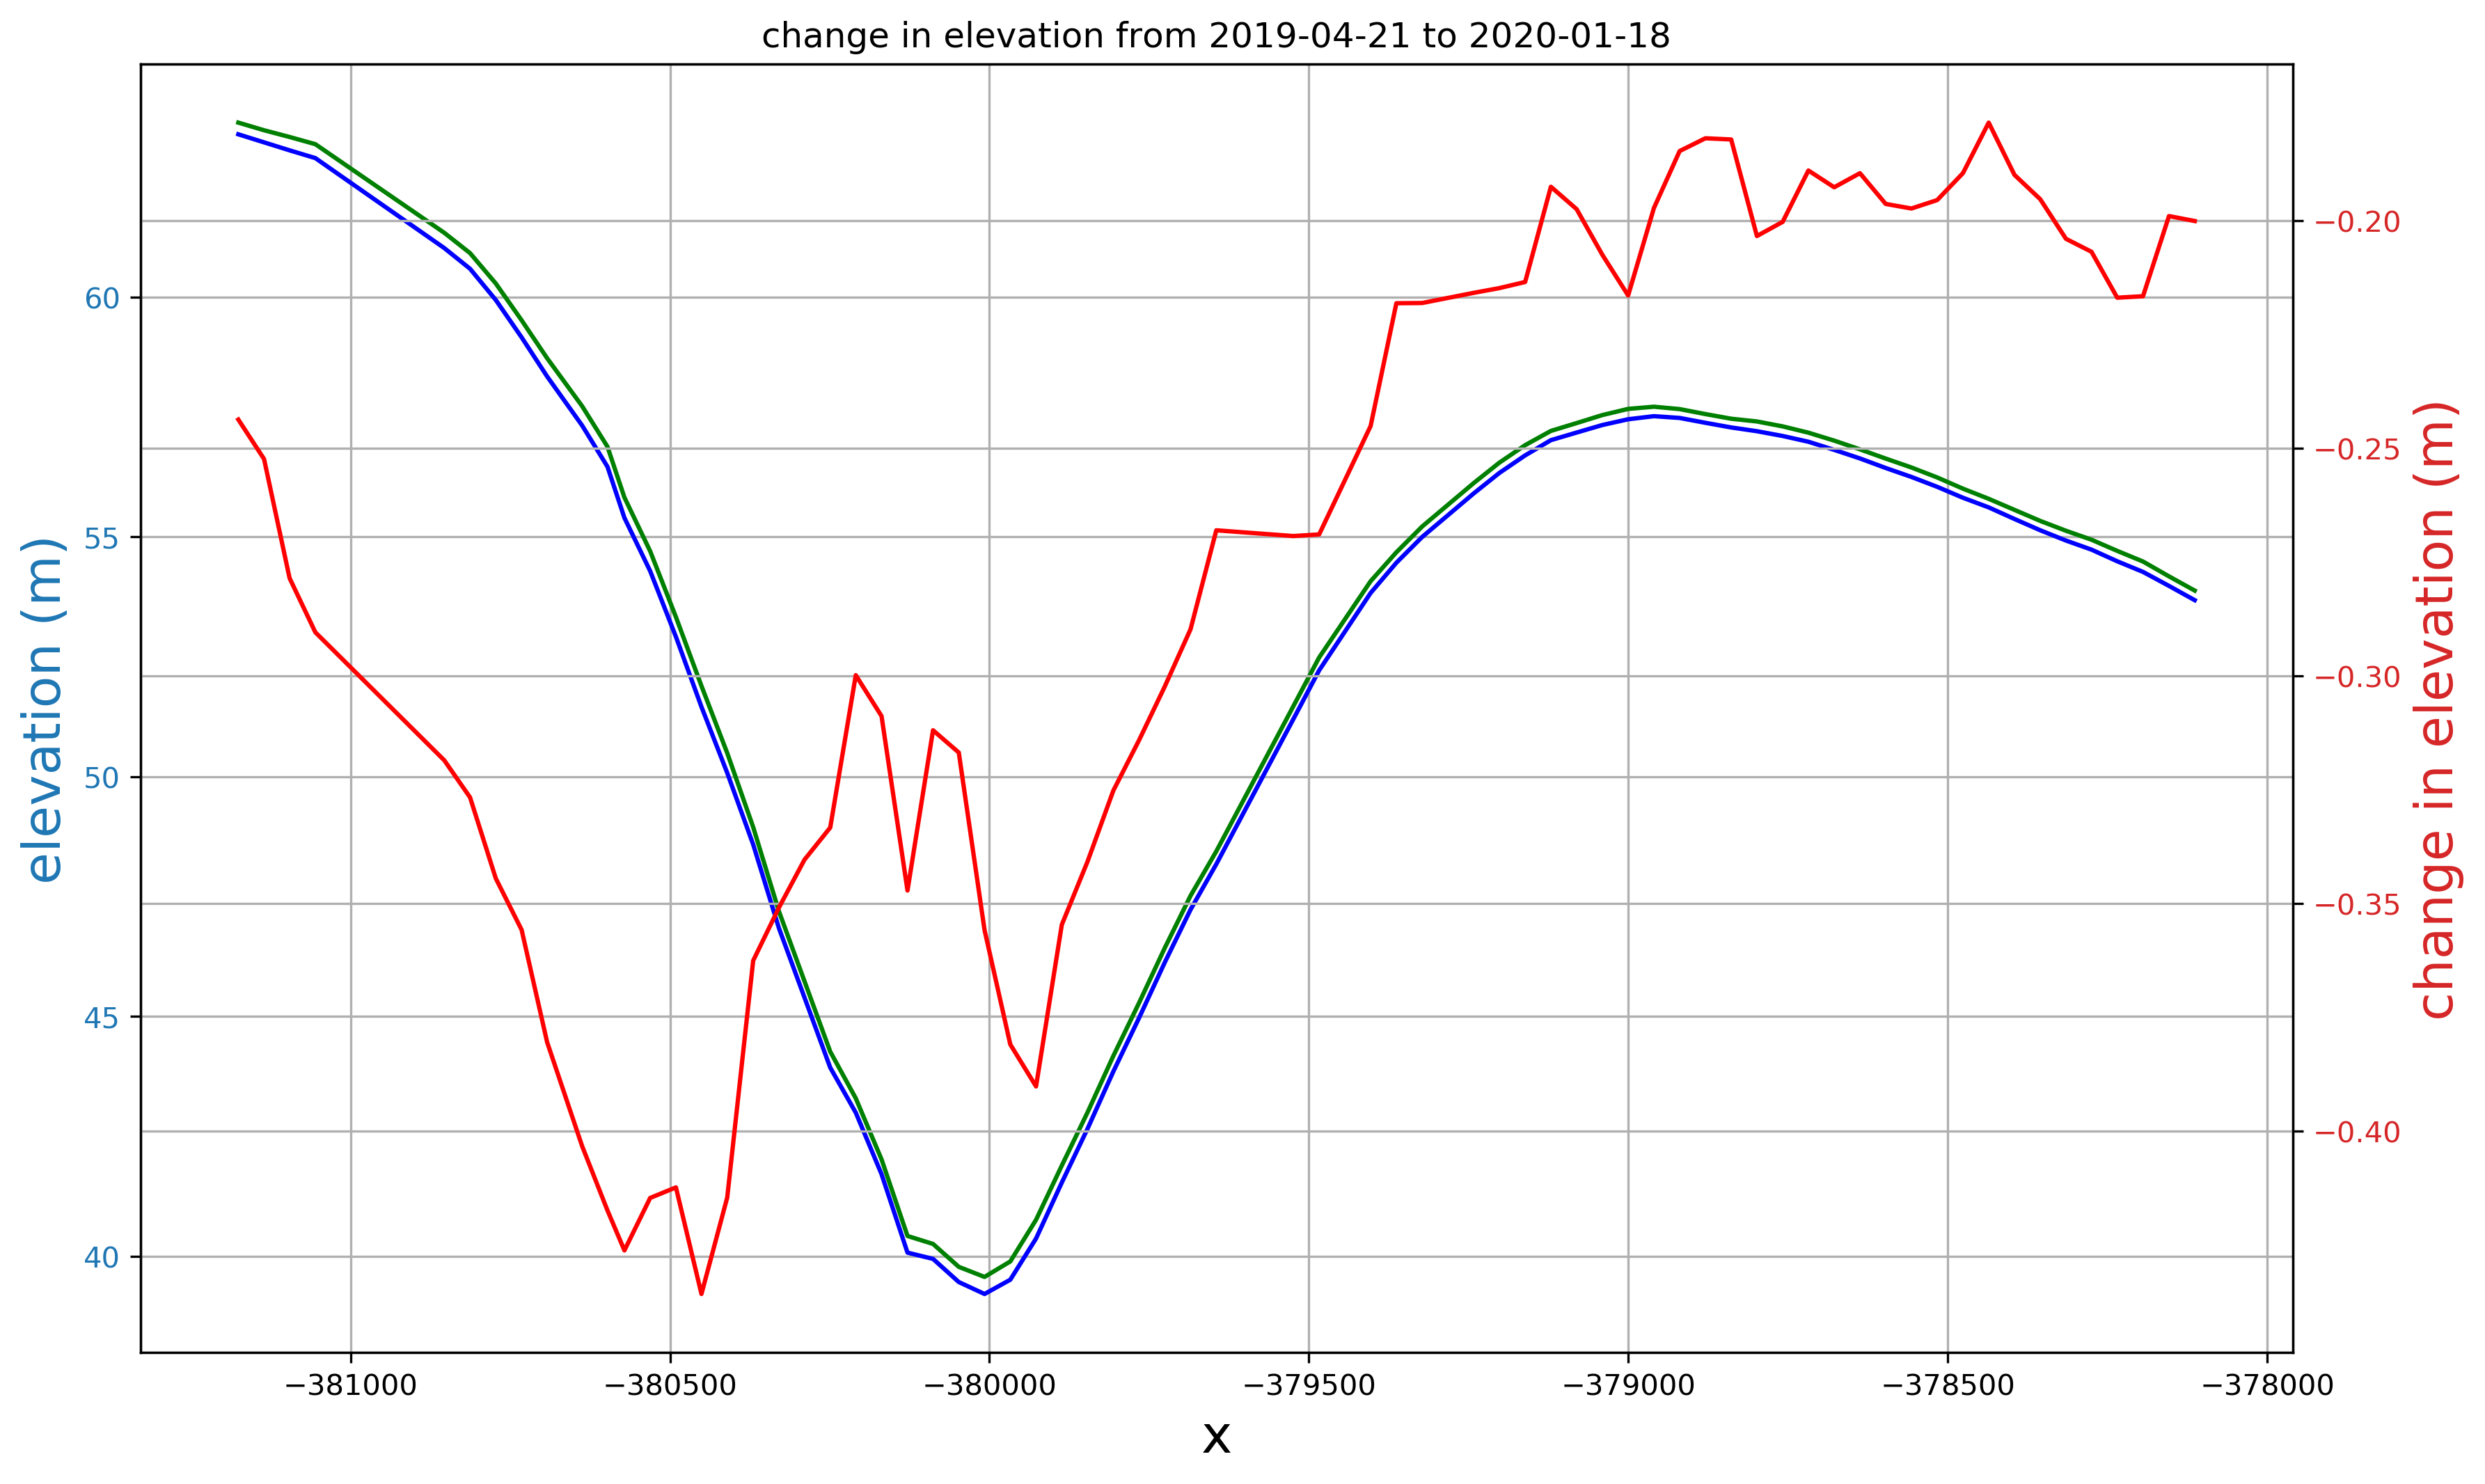

In [95]:
fig, ax1 = plt.subplots(figsize=(12,7),dpi=300)
color = 'tab:blue'
ax1.set_xlabel('x',fontsize=18)
ax1.set_ylabel('elevation (m)', color=color,fontsize=18)
ax1.plot(near6_6.x,near6_6.h_corr,'b-')
ax1.plot(near6_3.x,near6_3.h_corr,'g-')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('change in elevation (m)', color=color,fontsize=18)  # we already handled the x-label with ax1
ax2.plot(dh_near_line6.x,dh_near_line6.h_corr,'r-')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f"change in elevation from {near6_3.utc_time.mean().date()} to {near6_6.utc_time.mean().date()}")
plt.show()

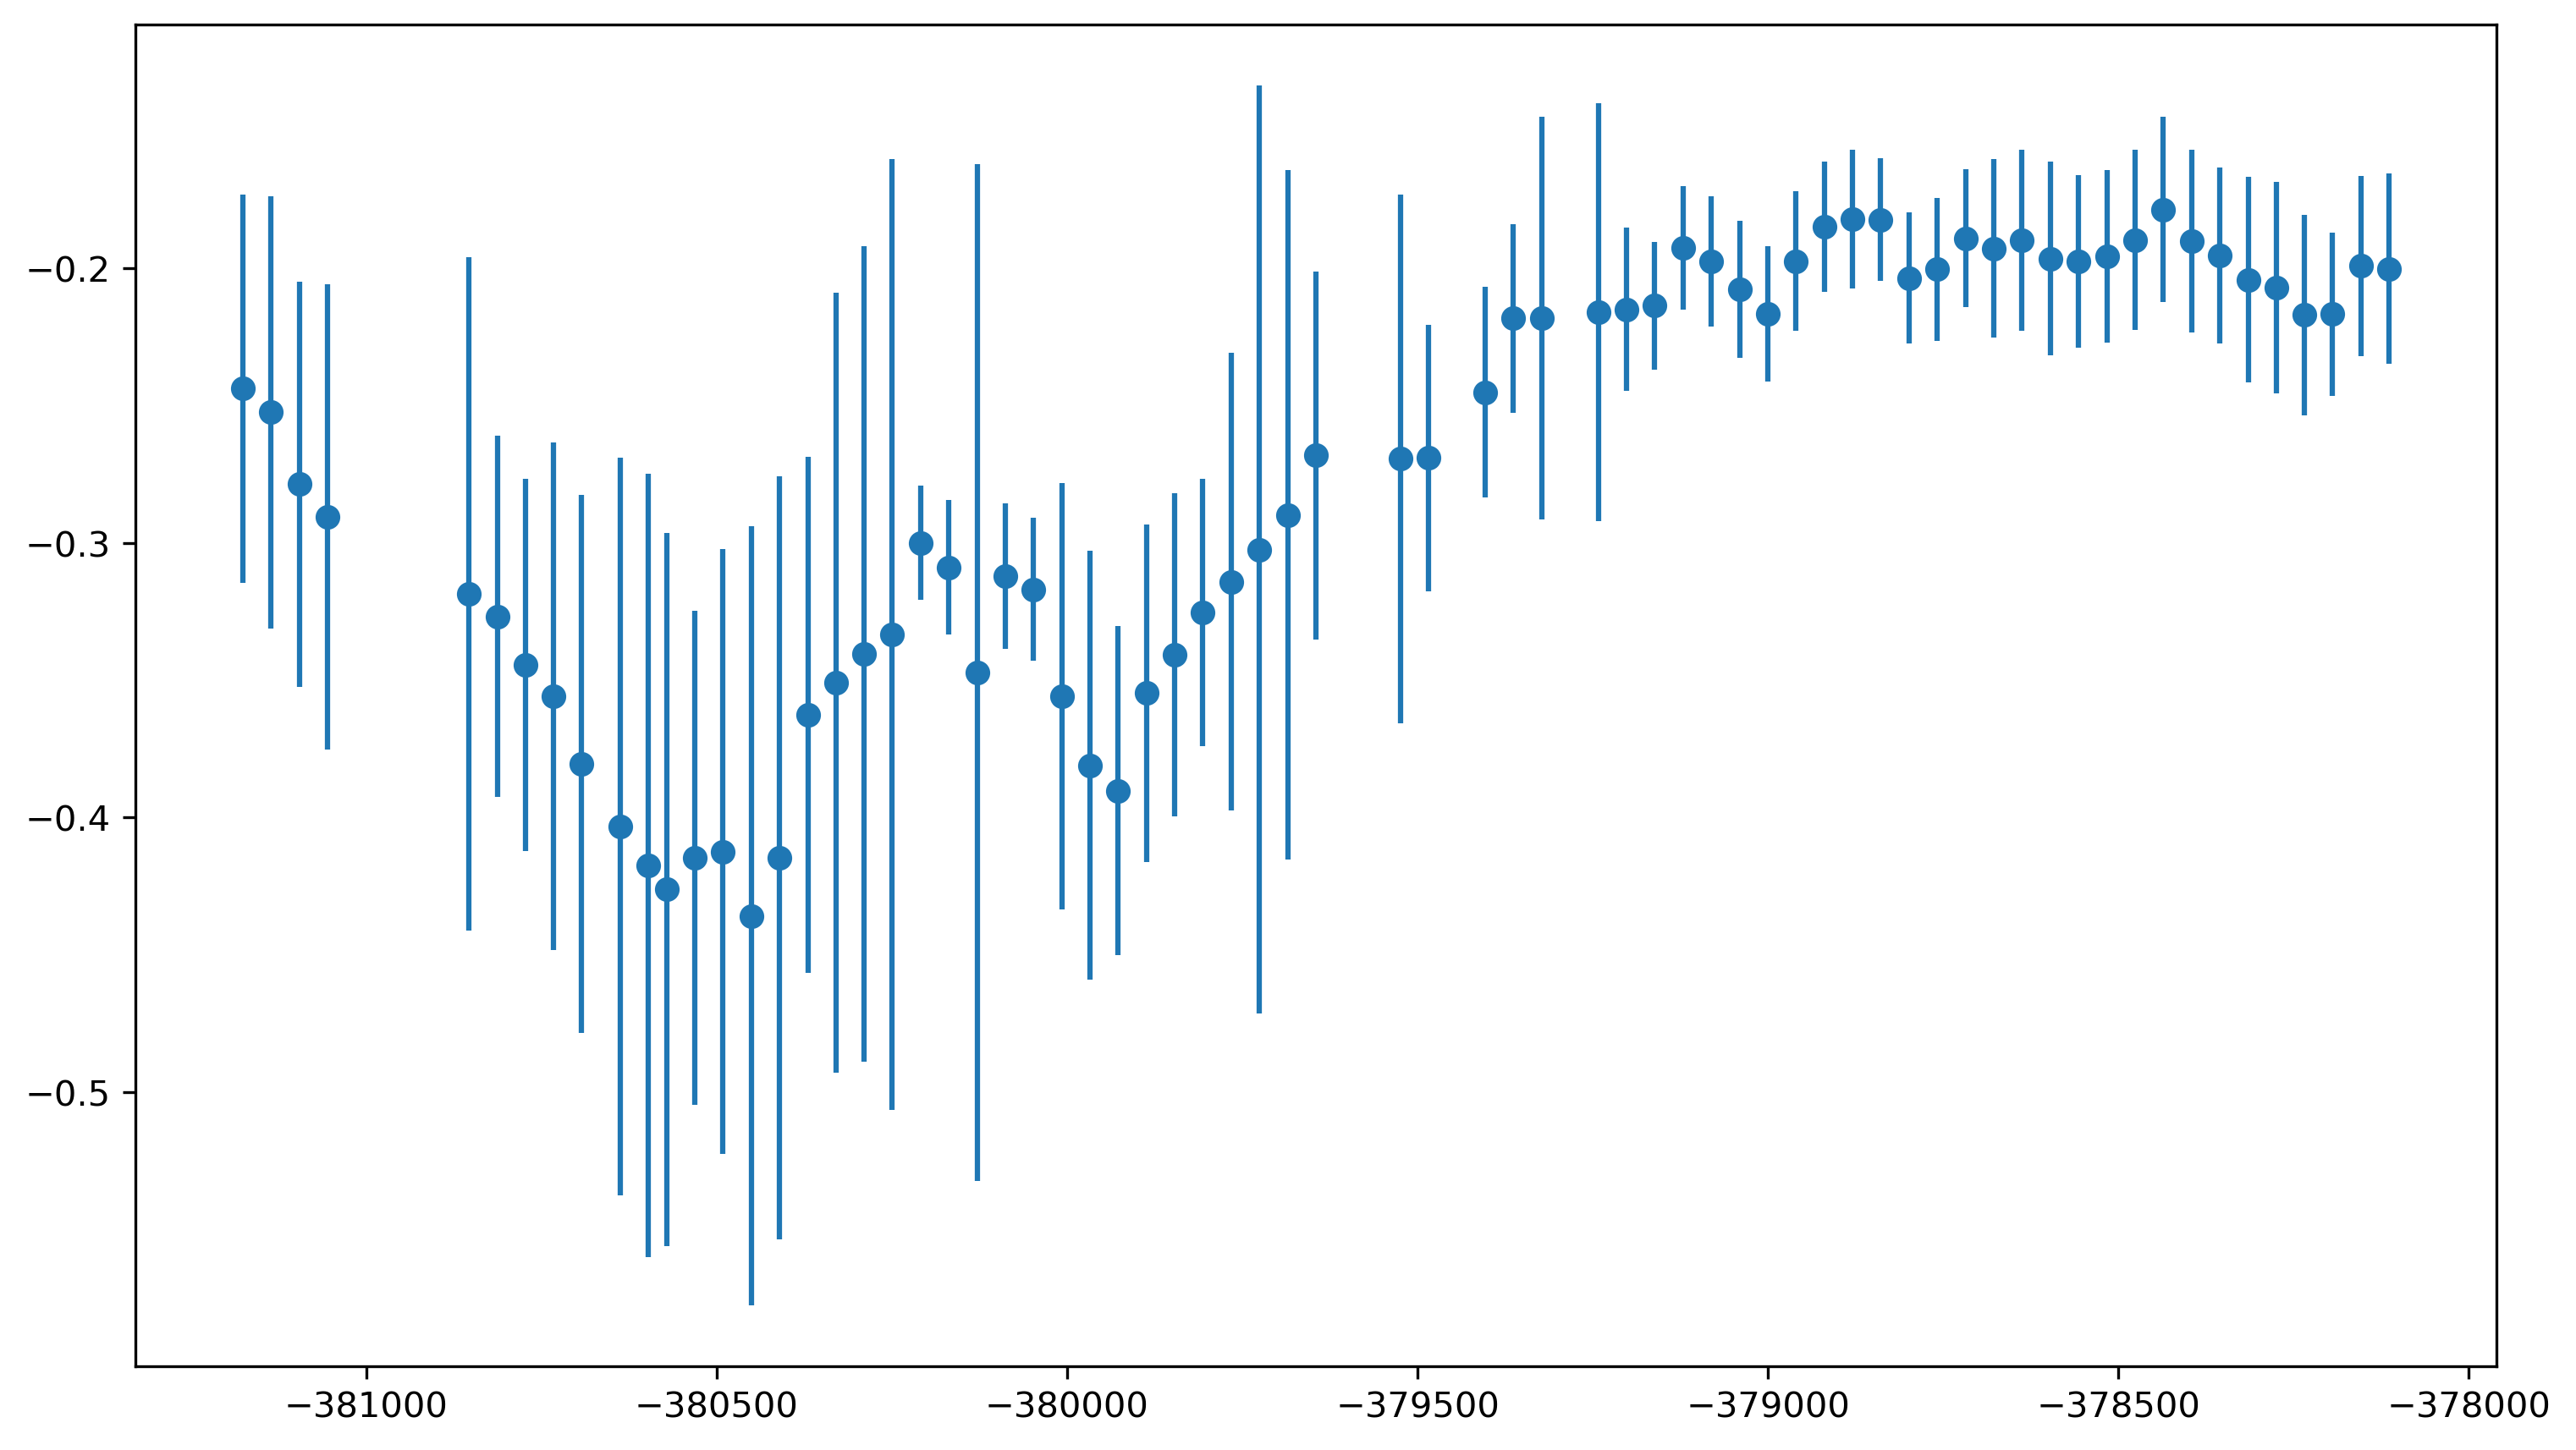

In [97]:
#plot with error bars
plt.figure(figsize=(12,7),dpi=300)
plt.errorbar(dh_near_line6.x,dh_near_line6.h_corr,yerr=dh_near_line6.h_corr_sigma,xerr=0,marker='o',linestyle="None")
plt.show()

In [98]:
f = interpolate.interp1d( [dh_near_line6.x.iloc[0],dh_near_line6.x.iloc[-1]], [dh_near_line6.h_corr.iloc[0],dh_near_line6.h_corr.iloc[-1]])
trendline = f(dh_near_line6.x)
adjusted =dh_near_line6.h_corr-trendline

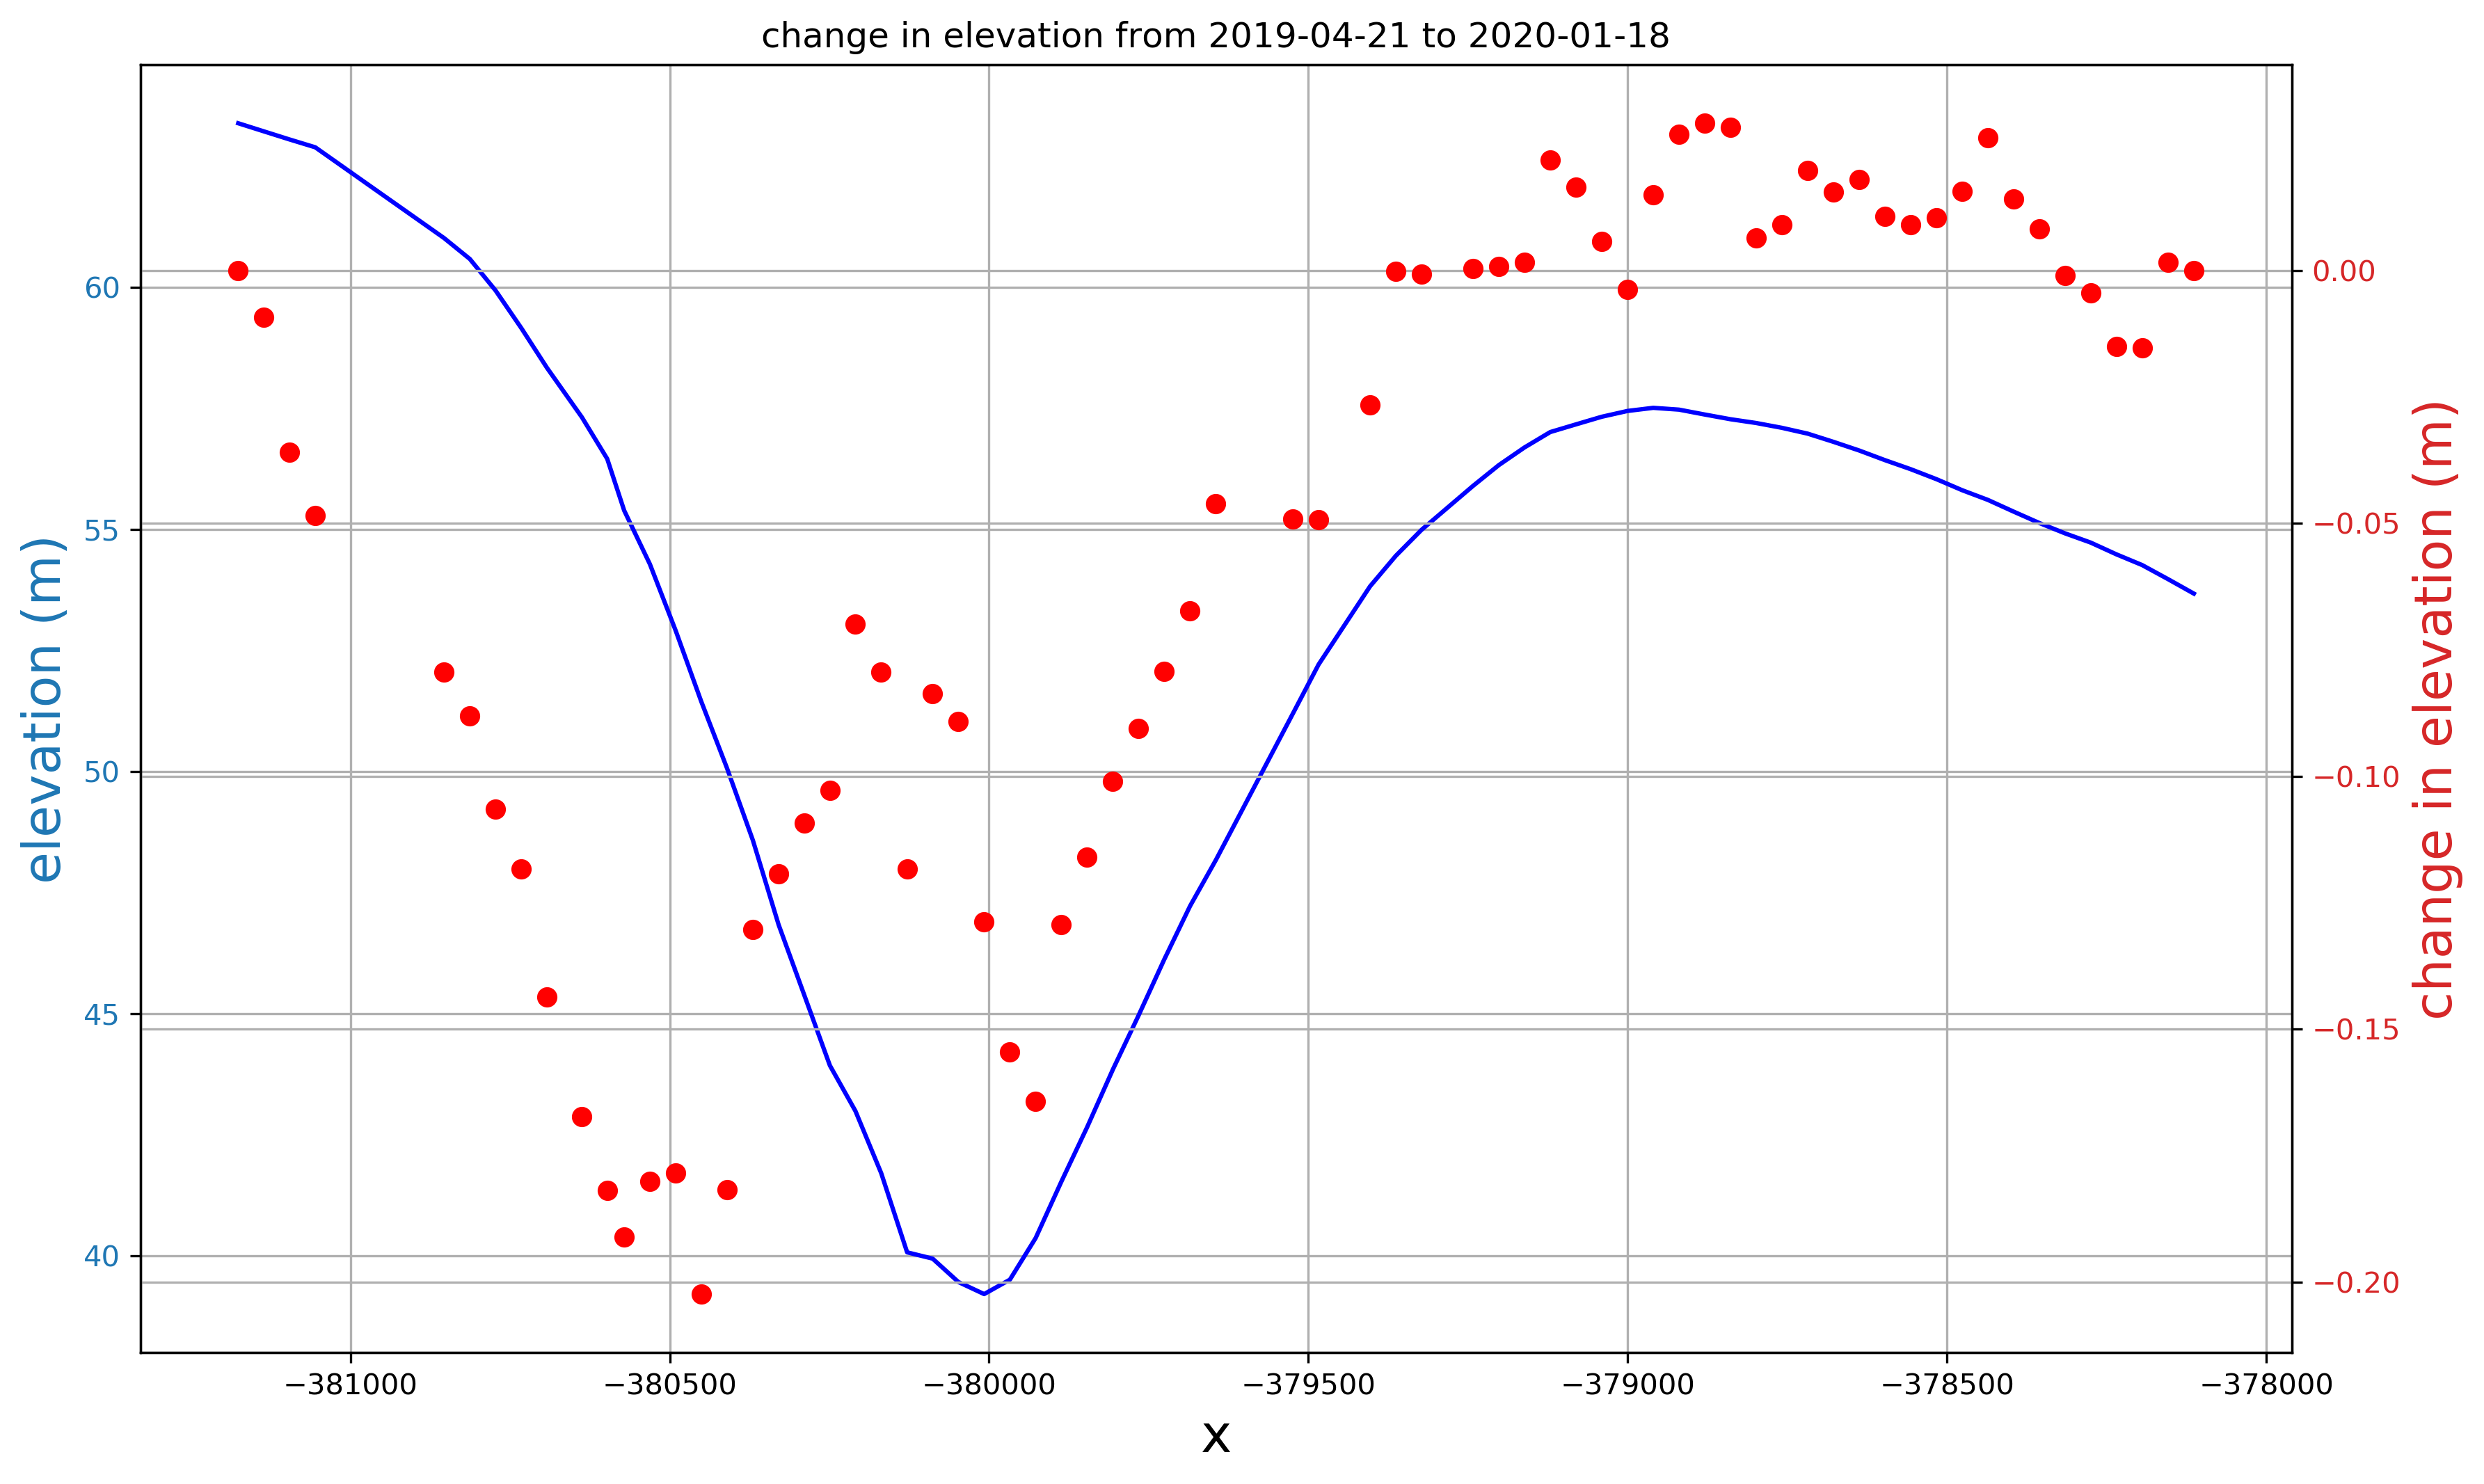

In [99]:
fig, ax1 = plt.subplots(figsize=(12,7),dpi=300)
color = 'tab:blue'
ax1.set_xlabel('x',fontsize=18)
ax1.set_ylabel('elevation (m)', color=color,fontsize=18)
ax1.plot(near6_6.x,near6_6.h_corr,'b-')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('change in elevation (m)', color=color,fontsize=18)  # we already handled the x-label with ax1
ax2.plot(dh_near_line6.x,adjusted,'ro')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f"change in elevation from {near6_3.utc_time.mean().date()} to {near6_6.utc_time.mean().date()}")
plt.show()

The above plot shows something complicated going on

## IE we may have an accretion signal in icesat2

next I want to look for a melt signal, if there are any points around the melt area
# Do the same but near line 7

So we have about one line of coverage. Lets isolate this to a buffer around line 7

In [108]:
line7 = LineString(gdf_line7.geometry.tolist())

In [112]:
gdf_cycle3['intersects_line7'] = gdf_cycle3.geometry.intersects(line7.buffer(300))
near7_3 = gdf_cycle3[df_cycle3.intersects_line7==True]

In [113]:
gdf_cycle6['intersects_line7'] = gdf_cycle5.geometry.intersects(line7.buffer(300))
near7_6 = gdf_cycle6[gdf_cycle6.intersects_line7==True]

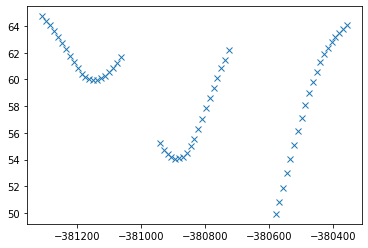

In [115]:
plt.plot(near7_3.x,near7_3.h_corr,'x')
plt.plot(near7_6.x,near7_6.h_corr,':')

In [105]:
plt.figure(figsize=(15,6))
plt.plot(near7_3.x.iloc[1:11],near7_3.h_corr.iloc[1:11],'x')
plt.plot(near7_6.x,near7_6.h_corr)

NameError: name 'near7_6' is not defined

In [38]:
near7_3=near7_3.iloc[1:11]

In [39]:
gdh_cycle63['intersects_line7'] = gdh_cycle63.geometry.intersects(line7.buffer(300))
dh_near_line7 = gdh_cycle63[gdh_cycle63.intersects_line7==True]
# dh_near_line6

In [40]:
plt.figure(figsize=(15,6))
plt.plot(dh_near_line7.x,dh_near_line7.h_corr,'x')

In [41]:
fig, ax1 = plt.subplots(figsize=(12,7),dpi=300)
color = 'tab:blue'
ax1.set_xlabel('x',fontsize=18)
ax1.set_ylabel('elevation (m)', color=color,fontsize=18)
ax1.plot(near7_5.x,near7_5.h_corr,'b-')
ax1.plot(near7_3.x.iloc[1:11],near7_3.h_corr.iloc[1:11],'g-')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('change in elevation (m)', color=color,fontsize=18)  # we already handled the x-label with ax1
ax2.plot(dh_near_line7.x,dh_near_line7.h_corr,'r-')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f"change in elevation from {near7_3.utc_time.mean().date()} to {near7_5.utc_time.mean().date()}")
plt.show()

<ErrorbarContainer object of 3 artists>

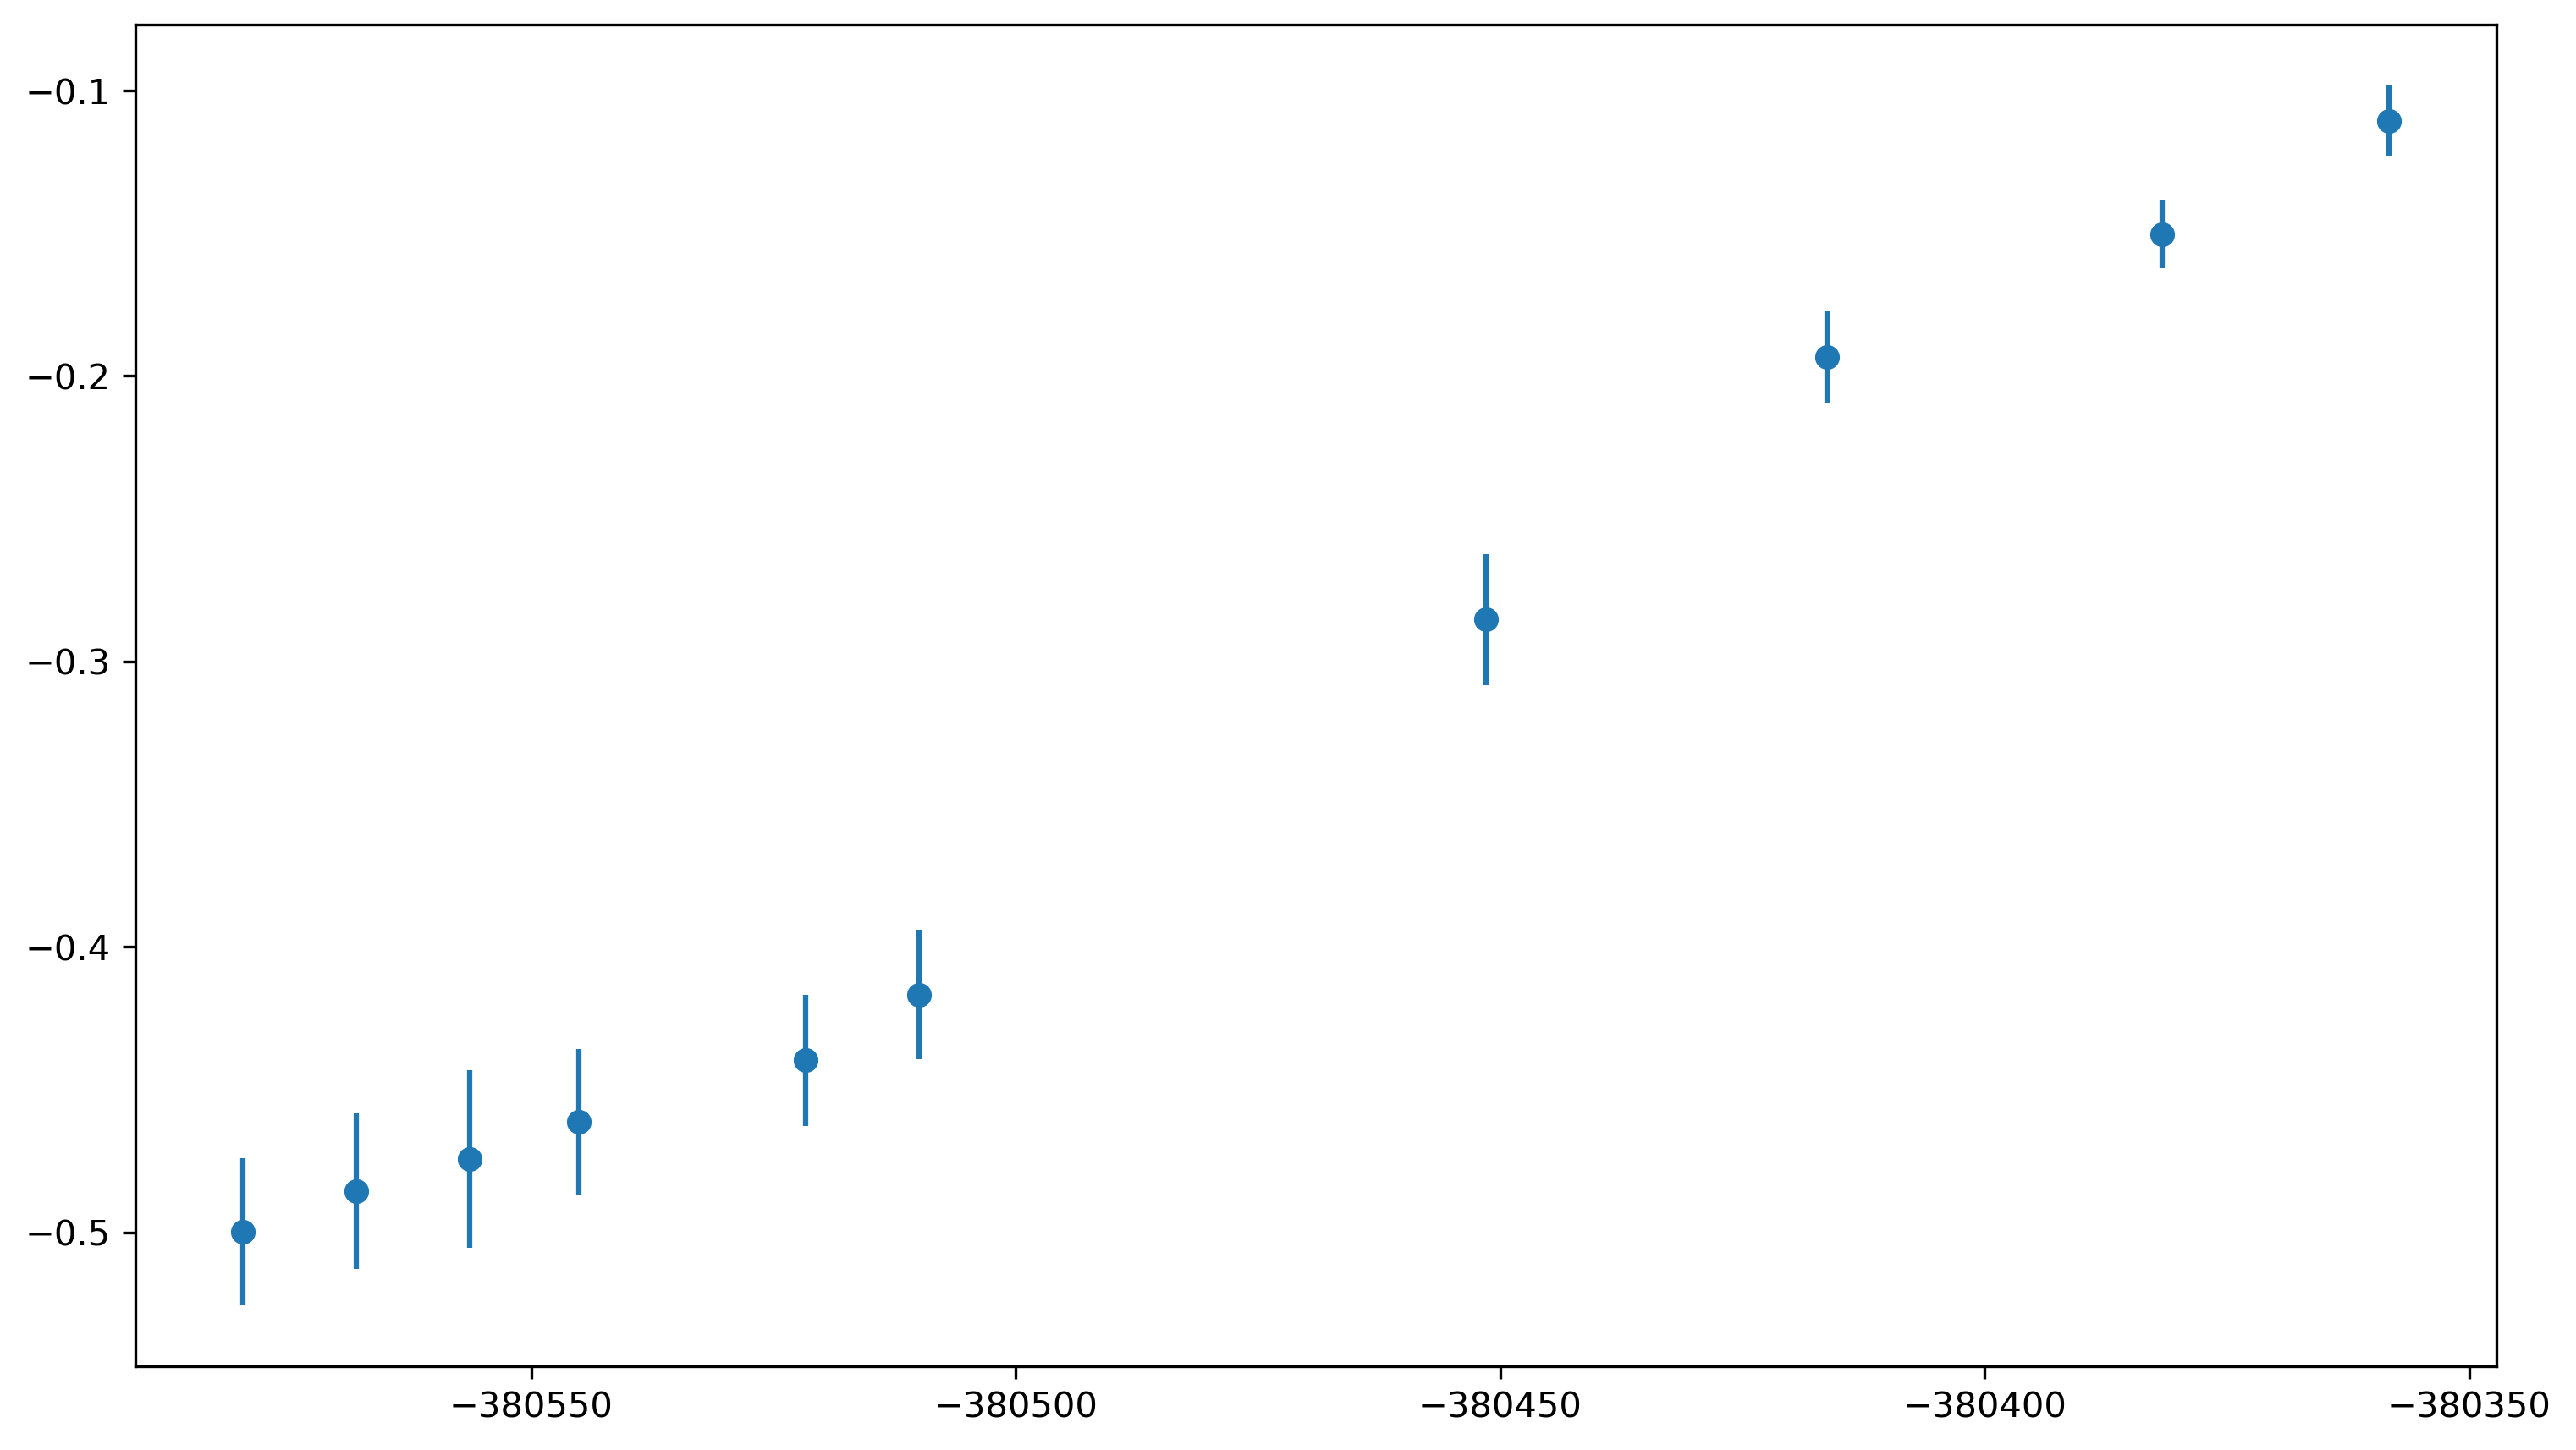

In [42]:
#plot with error bars
plt.figure(figsize=(12,7),dpi=300)
plt.errorbar(dh_near_line7.x,dh_near_line7.h_corr,yerr=dh_near_line7.h_corr_sigma,xerr=0,marker='o',linestyle="None")

In [43]:
f = interpolate.interp1d( [dh_near_line7.x.iloc[0],dh_near_line7.x.iloc[-1]], [dh_near_line7.h_corr.iloc[0],dh_near_line7.h_corr.iloc[-1]])
trendline = f(dh_near_line7.x)
adjusted7 =dh_near_line7.h_corr-trendline

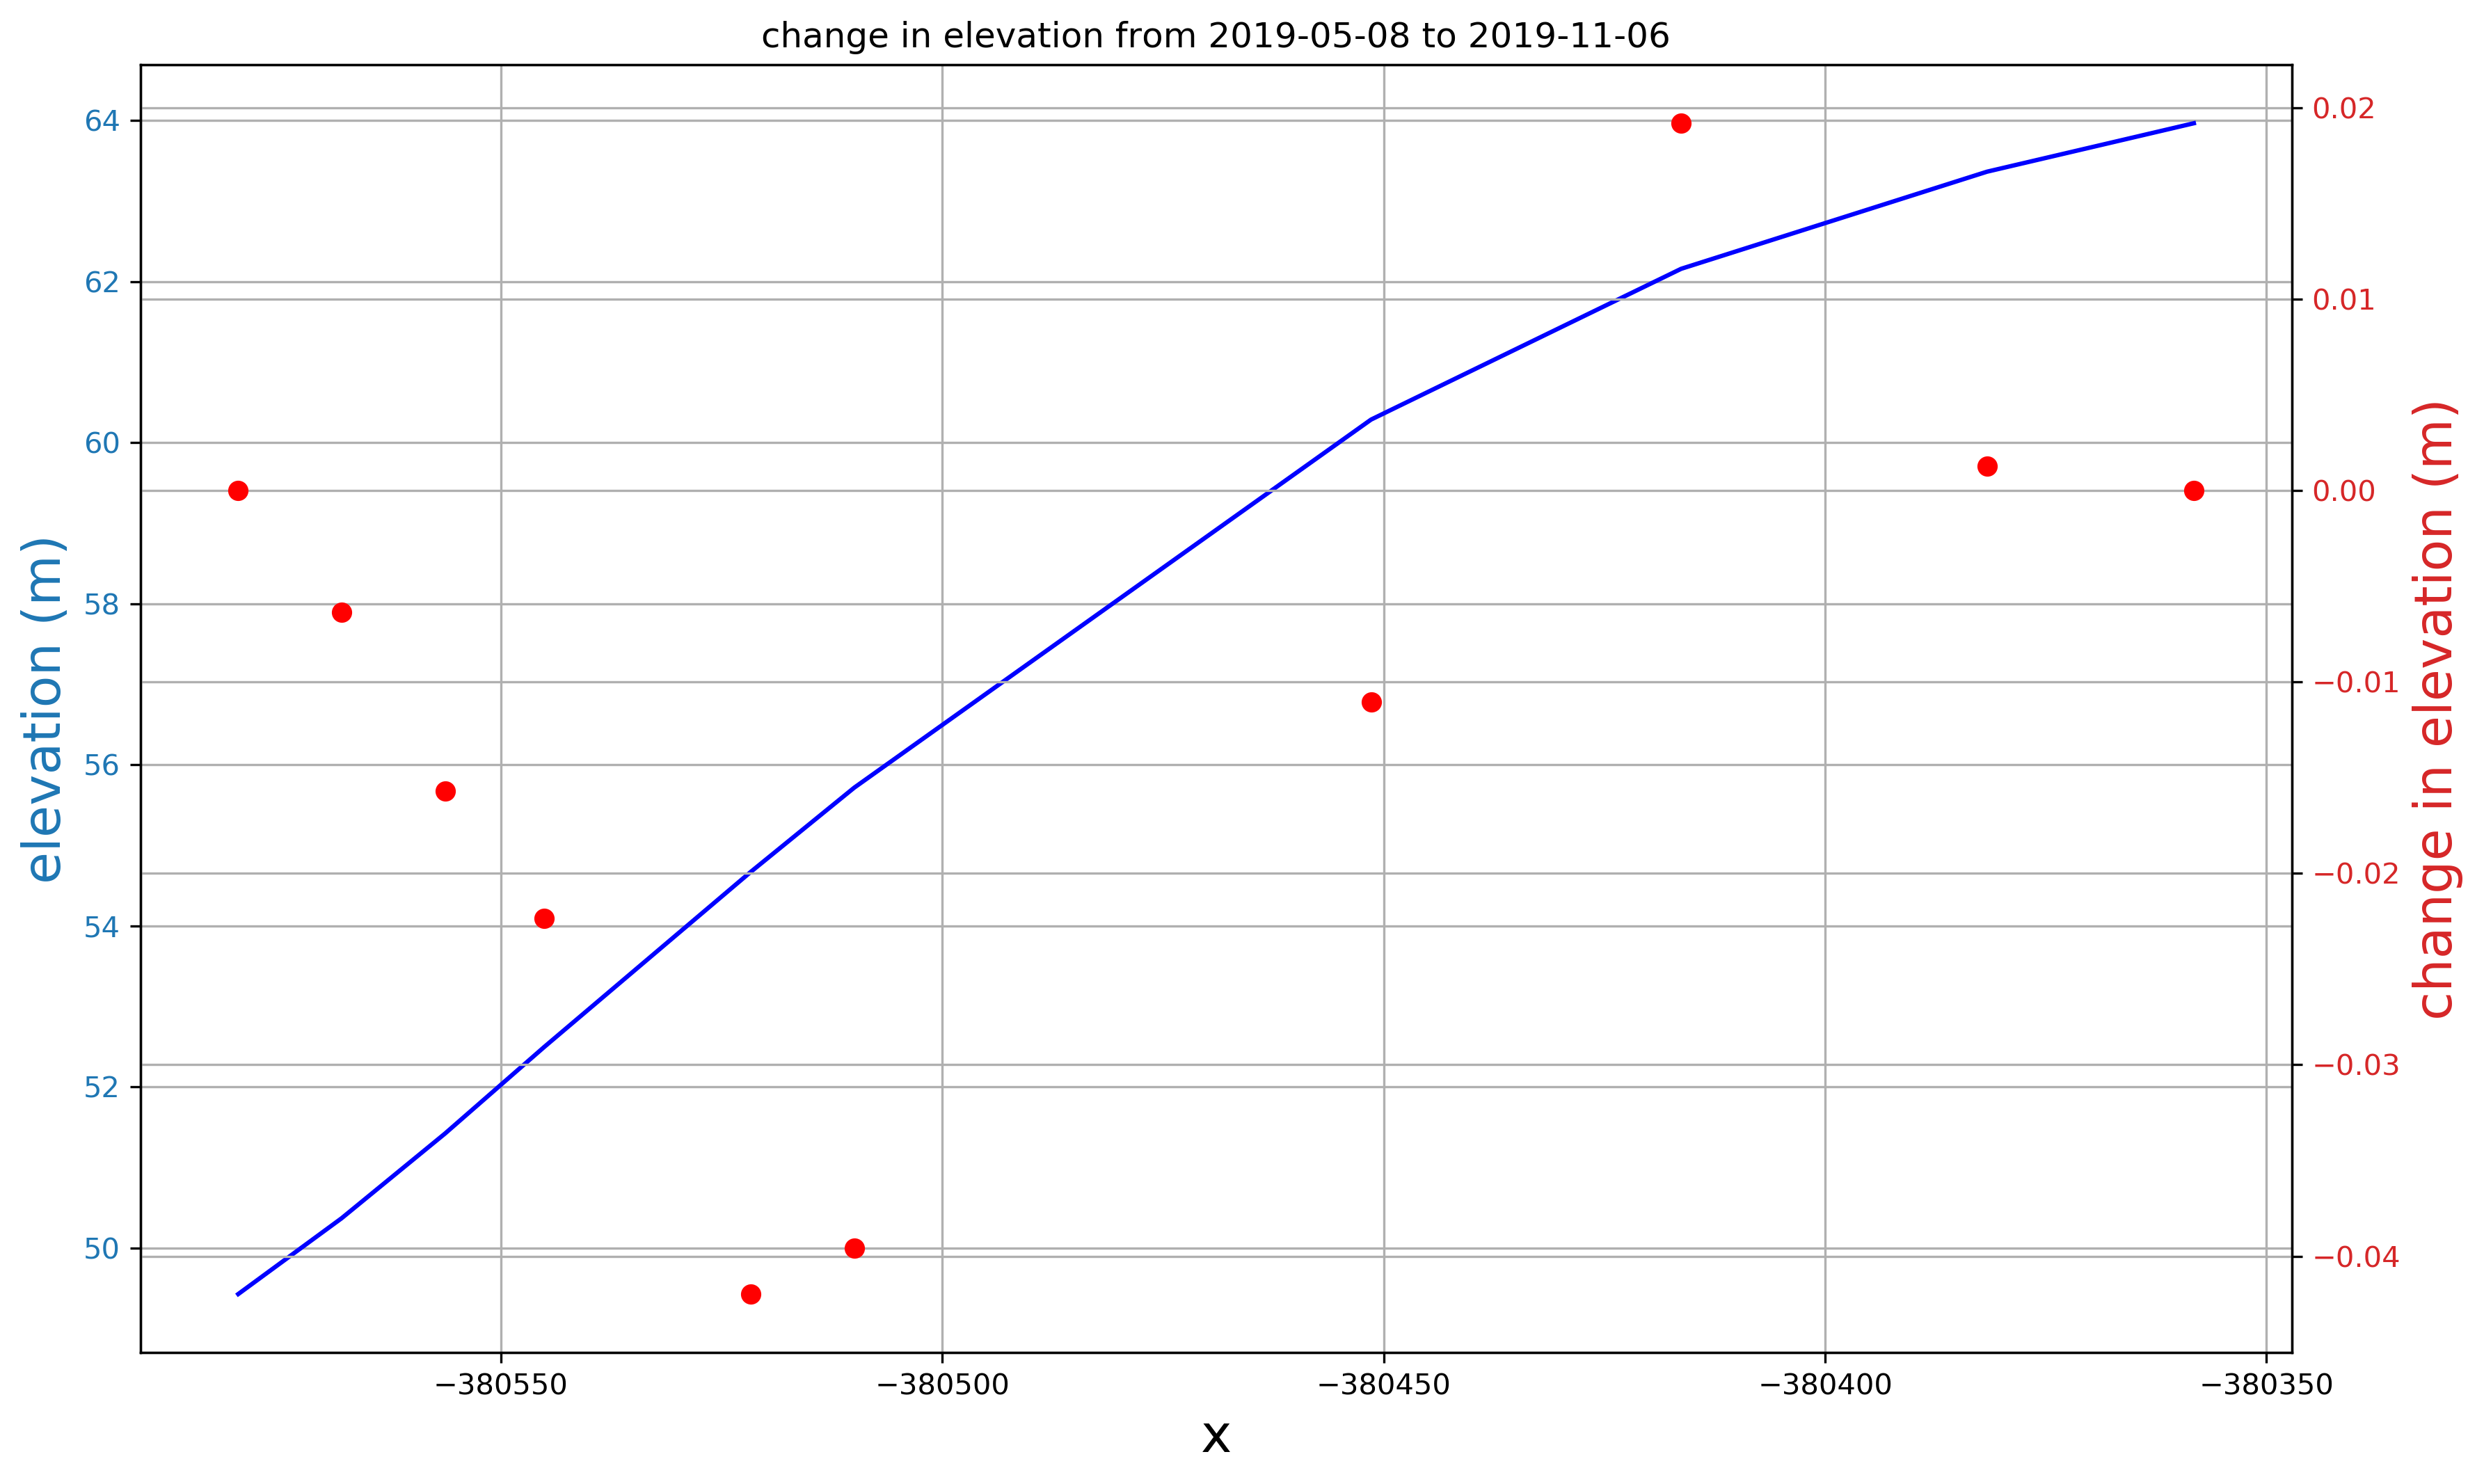

In [44]:
fig, ax1 = plt.subplots(figsize=(12,7),dpi=300)
color = 'tab:blue'
ax1.set_xlabel('x',fontsize=18)
ax1.set_ylabel('elevation (m)', color=color,fontsize=18)
ax1.plot(near7_5.x,near7_5.h_corr,'b-')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('change in elevation (m)', color=color,fontsize=18)  # we already handled the x-label with ax1
ax2.plot(dh_near_line7.x,adjusted7,'ro')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f"change in elevation from {near7_3.utc_time.mean().date()} to {near7_5.utc_time.mean().date()}")
plt.show()

# Conclusion

I could dig further into the few points in the melt area, but its not very interesting, REMA has much much better coverage for looking at the melt signal. However it is interesting that we can see accretion near line 6

# Contuinue digging

In [116]:
melt_area = gpd.read_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/melt_area_REMA.shp')

In [117]:
plt.figure(figsize=(8,8))
plt.plot(dh_cycle63.x,dh_cycle63.y,'x')
plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'x')
plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')

fig above shows melt area relative to icesat2 lines

In [118]:
gdh_cycle63['intersects_melt_area'] = gdh_cycle63.geometry.intersects(melt_area.iloc[0].geometry.buffer(300))
dh_near_melt_area = gdh_cycle63[gdh_cycle63.intersects_melt_area==True]

In [119]:
melt = Point(-380650, -725450)
accr = Point(-377950,-729050)

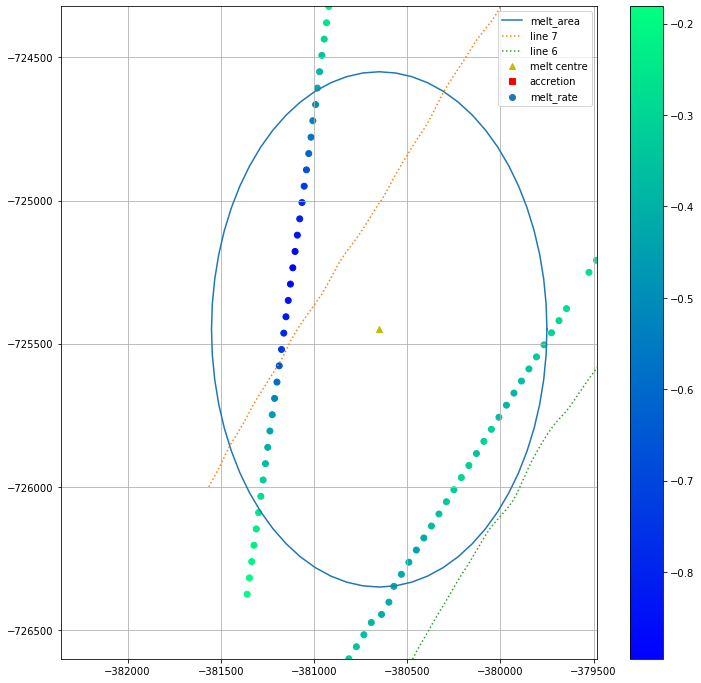

In [124]:
plt.figure(figsize=(12,12))
plt.scatter(dh_near_melt_area.x,dh_near_melt_area.y,c=dh_near_melt_area.h_corr,cmap='winter')
plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')
plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
plt.plot(melt.x,melt.y,'y^')
plt.plot(accr.x,accr.y,'rs')
plt.xlim(dh_near_melt_area.x.min()-1000,dh_near_melt_area.x.max())
plt.ylim(dh_near_melt_area.y.min(),dh_near_melt_area.y.max())
plt.legend(['melt_area','line 7', 'line 6','melt centre','accretion','melt_rate'])
plt.colorbar()
plt.grid()

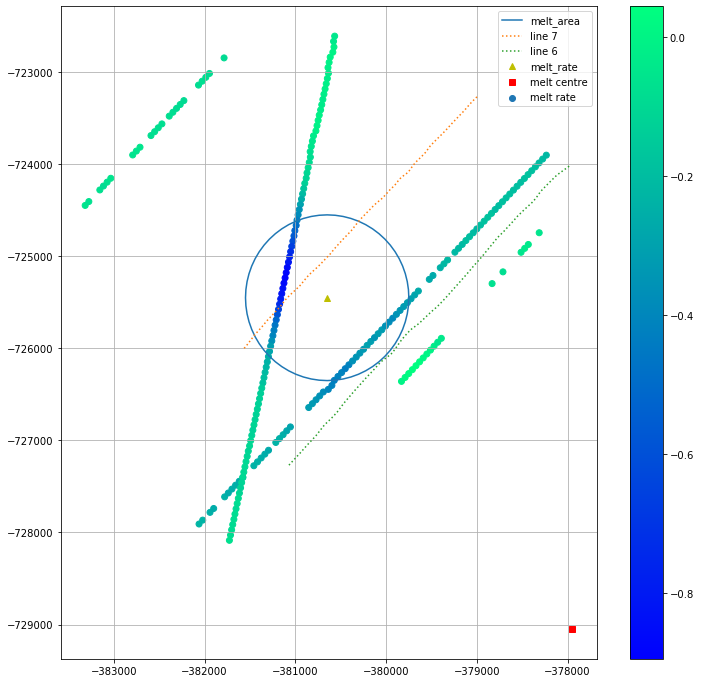

In [127]:
gdh_cycle63['intersects_melt_area'] = gdh_cycle63.geometry.intersects(melt_area.iloc[0].geometry.buffer(2000))
dh_near_melt_area = gdh_cycle63[gdh_cycle63.intersects_melt_area==True]
plt.figure(figsize=(12,12))
plt.scatter(dh_near_melt_area.x,dh_near_melt_area.y,c=dh_near_melt_area.h_corr,cmap='winter')
plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')
plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
plt.plot(melt.x,melt.y,'y^')
plt.plot(accr.x,accr.y,'rs')
plt.legend(['melt_area','line 7', 'line 6','melt_rate','melt centre','melt rate'])
plt.colorbar()
plt.grid()

In [135]:
gdh_cycle63['intersects_melt_area'] = gdh_cycle63.geometry.intersects(melt_area.iloc[0].geometry.buffer(8000))
dh_near_melt_area = gdh_cycle63[gdh_cycle63.intersects_melt_area==True]
plt.figure(figsize=(12,12))
plt.scatter(dh_near_melt_area.x,dh_near_melt_area.y,c=dh_near_melt_area.h_corr,cmap='winter')
# plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')
plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
plt.plot(gdf_line5.geometry.x,gdf_line5.geometry.y,':')
plt.plot(gdf_line4.geometry.x,gdf_line4.geometry.y,':')
plt.plot(gdf_line3.geometry.x,gdf_line3.geometry.y,':')
plt.plot(gdf_line2.geometry.x,gdf_line2.geometry.y,':')
plt.plot(gdf_line1.geometry.x,gdf_line1.geometry.y,':')
plt.plot(gdf_line0.geometry.x,gdf_line0.geometry.y,':')
plt.plot(melt.x,melt.y,'y^')
plt.plot(accr.x,accr.y,'rs')
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max())
plt.legend(['line 7', 'line 6','line 5','line 4','line 3','line 2','line 1','line 0','melt centre','accretion','melt_rate'])
plt.colorbar()
plt.grid()

# INCOMPLETE FROM HERE ON, needs working over

# So using icesat2 we have identified areas of accretion and melt

### 1. Melt next to KIS2

also note that just downstream is accretion

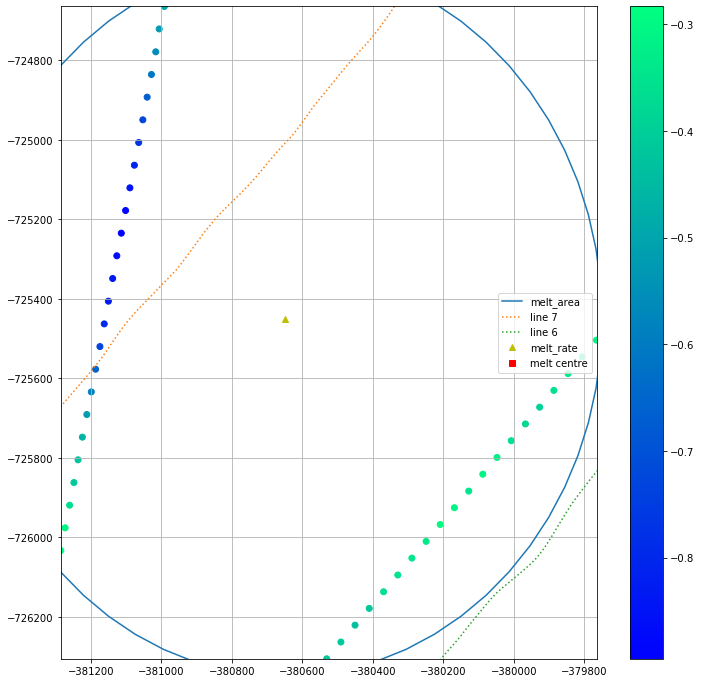

In [136]:
gdh_cycle63['intersects_melt_area'] = gdh_cycle63.geometry.intersects(melt_area.iloc[0].geometry)
dh_near_melt_area = gdh_cycle63[gdh_cycle63.intersects_melt_area==True]
plt.figure(figsize=(12,12))
plt.scatter(dh_near_melt_area.x,dh_near_melt_area.y,c=dh_near_melt_area.h_corr,cmap='winter')
plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')
plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
plt.xlim(dh_near_melt_area.x.min(),dh_near_melt_area.x.max())
plt.ylim(dh_near_melt_area.y.min(),dh_near_melt_area.y.max())
plt.plot(melt.x,melt.y,'y^')
plt.plot(accr.x,accr.y,'rs')
plt.legend(['melt_area','line 7', 'line 6','melt_rate','melt centre'])
plt.colorbar()
plt.grid()

### 2. Accretion at line 3

In [137]:
gdh_cycle63['intersects_melt_area'] = gdh_cycle63.geometry.intersects(melt_area.iloc[0].geometry.buffer(6000))
dh_near_melt_area = gdh_cycle63[gdh_cycle63.intersects_melt_area==True]
plt.figure(figsize=(12,12))
plt.scatter(dh_near_melt_area.x,dh_near_melt_area.y,c=dh_near_melt_area.h_corr,cmap='winter')
plt.plot(gdf_line4.geometry.x,gdf_line4.geometry.y,':')
plt.plot(gdf_line3.geometry.x,gdf_line3.geometry.y,':')
plt.plot(gdf_line2.geometry.x,gdf_line2.geometry.y,':')
plt.xlim(gdf_line3.geometry.x.min()+200,gdf_line3.geometry.x.max()-200)
plt.ylim(gdf_line3.geometry.y.min()+200,gdf_line3.geometry.y.max()-200)
plt.plot(accr.x,accr.y,'rs')
plt.legend(['melt_rate','line 4','line 3','line 2','accretion centre'])
plt.colorbar()
plt.grid()

In [138]:
accretion_centre = Point(-377950,-729050)
gdh_cycle63['intersects_acc'] = gdh_cycle63.geometry.intersects(accretion_centre.buffer(800))
dh_near_acc = gdh_cycle63[gdh_cycle63.intersects_acc==True]

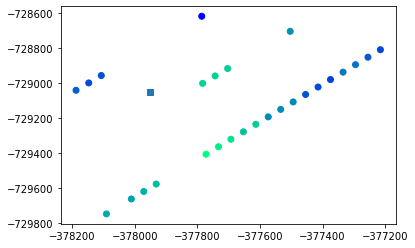

In [139]:
plt.scatter(dh_near_acc.x,dh_near_acc.y,c=dh_near_acc.h_corr,cmap='winter')
plt.plot(-377950,-729050,'s')

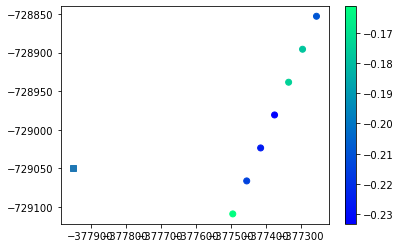

In [140]:
f = 19
t =-1
plt.scatter(dh_near_acc.x.iloc[f:t],dh_near_acc.y.iloc[f:t],c=dh_near_acc.h_corr.iloc[f:t],cmap='winter')
plt.plot(-377950,-729050,'s')
plt.colorbar()

Text(0, 0.5, 'change in elevation (m)')

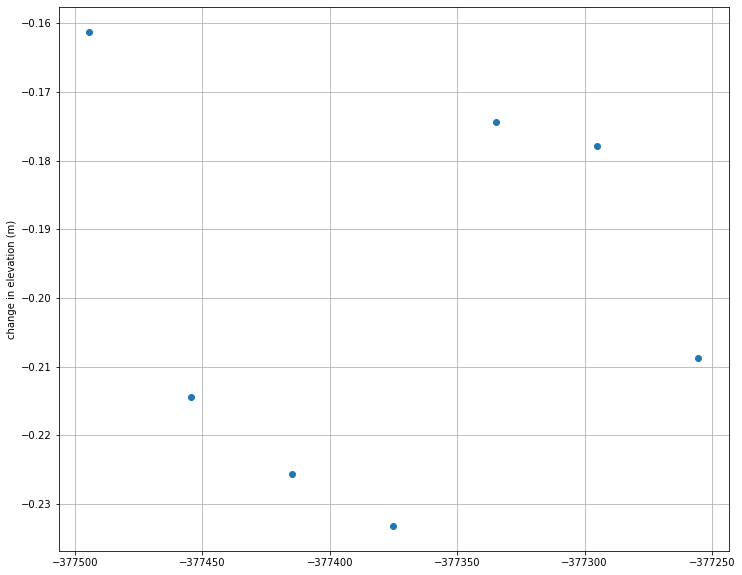

In [141]:
plt.figure(figsize=(12,10))
plt.plot(dh_near_acc.x.iloc[f:t],dh_near_acc.h_corr.iloc[f:t],'o')
plt.grid()
plt.ylabel('change in elevation (m)')

In [142]:
gdf_cycle3['near_acc'] = gdf_cycle3.geometry.intersects(accretion_centre.buffer(800))
nearacc_3 = gdf_cycle3[gdf_cycle3.near_acc==True]

In [143]:
gdf_cycle5['near_acc'] = gdf_cycle5.geometry.intersects(accretion_centre.buffer(800))
nearacc7_5 = gdf_cycle5[gdf_cycle5.near_acc==True]

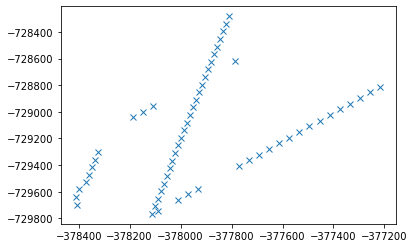

In [144]:
ff=22
tt=-1
plt.plot(nearacc7_5.x[ff:tt],nearacc7_5.y[ff:tt],'x')

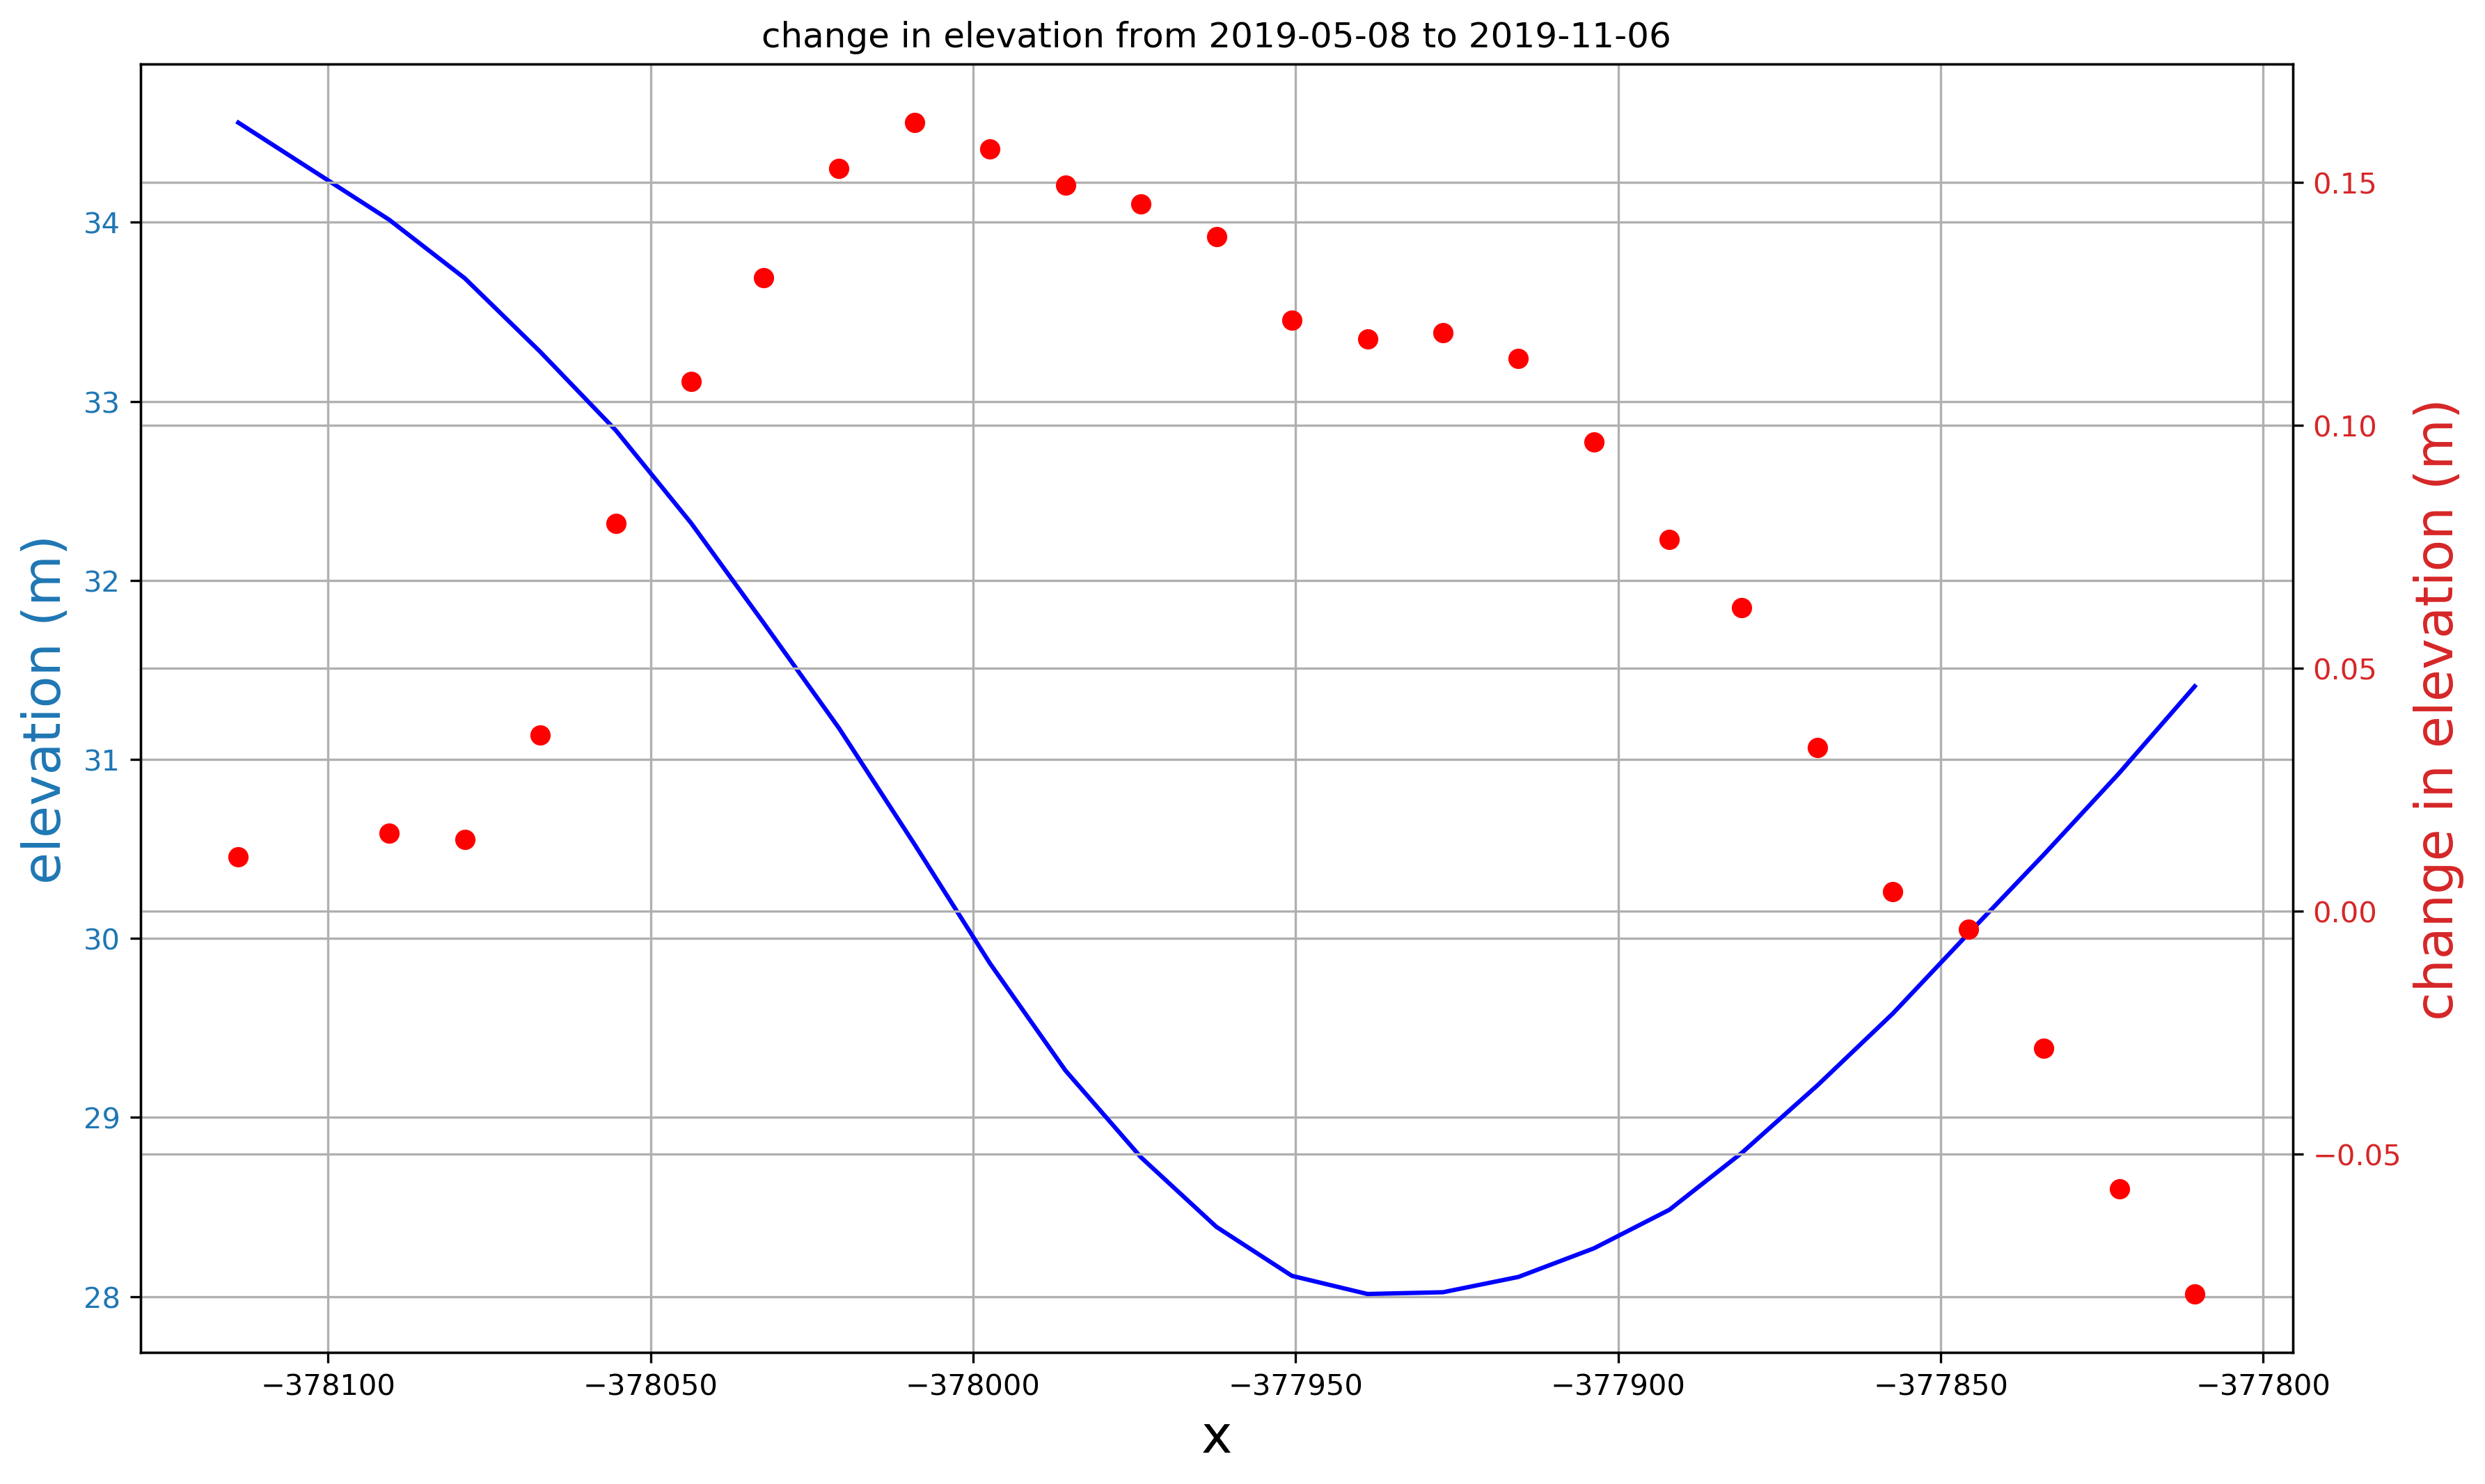

In [61]:
fig, ax1 = plt.subplots(figsize=(12,7),dpi=300)
color = 'tab:blue'
ax1.set_xlabel('x',fontsize=18)
ax1.set_ylabel('elevation (m)', color=color,fontsize=18)
ax1.plot(nearacc7_5.x[ff:tt],nearacc7_5.h_corr[ff:tt],'b-')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('change in elevation (m)', color=color,fontsize=18)  # we already handled the x-label with ax1
ax2.plot(dh_near_acc.x.iloc[f:t],dh_near_acc.h_corr.iloc[f:t],'ro')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f"change in elevation from {near7_3.utc_time.mean().date()} to {near7_5.utc_time.mean().date()}")
plt.show()

The above plot shows accretion near line 3

# Cross section of uplift

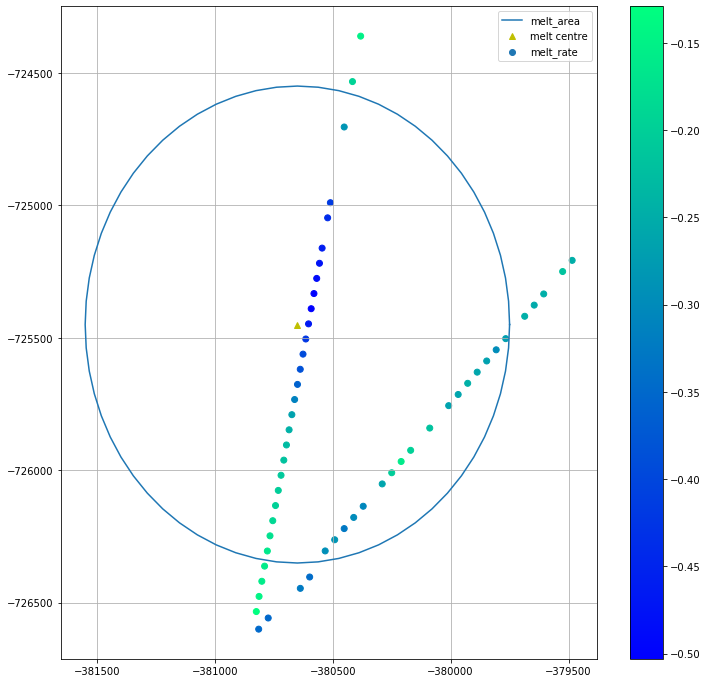

In [104]:
gdh_cycle63['intersects_melt_area'] = gdh_cycle63.geometry.intersects(melt_area.iloc[0].geometry.buffer(300))
dh_near_melt_area = gdh_cycle63[gdh_cycle63.intersects_melt_area==True]
plt.figure(figsize=(12,12))
plt.scatter(dh_near_melt_area.x,dh_near_melt_area.y,c=dh_near_melt_area.h_corr,cmap='winter')
plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')
plt.plot(melt.x,melt.y,'y^')
plt.legend(['melt_area','melt centre','melt_rate'])
plt.colorbar()
plt.grid()

In [63]:
fm = 0
tm =-26
plt.scatter(dh_near_melt_area.x.iloc[fm:tm],dh_near_melt_area.y.iloc[fm:tm],c=dh_near_melt_area.h_corr.iloc[fm:tm],cmap='winter')
plt.colorbar()

In [64]:
plt.figure(figsize=(12,10))
plt.plot(dh_near_melt_area.x.iloc[fm:tm],dh_near_melt_area.h_corr.iloc[fm:tm],'o')
plt.grid()
plt.ylabel('change in elevation (m)')

Text(0, 0.5, 'change in elevation (m)')

In [86]:
gdf_cycle3['near_melt'] = gdf_cycle3.geometry.intersects(melt_area.iloc[0].geometry.buffer(300))
near_melt_area_3 = gdf_cycle3[gdf_cycle3.near_melt==True]

In [87]:
gdf_cycle5['near_melt'] = gdf_cycle5.geometry.intersects(melt_area.iloc[0].geometry.buffer(300))
near_melt_5 = gdf_cycle5[gdf_cycle5.near_melt==True]

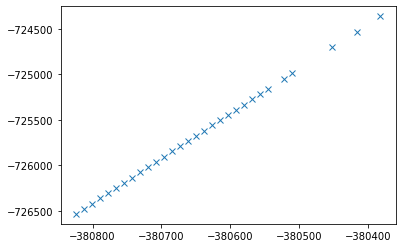

In [98]:
ffm=2
ttm=-69
plt.plot(near_melt_5.x[ffm:ttm],near_melt_5.y[ffm:ttm],'x')

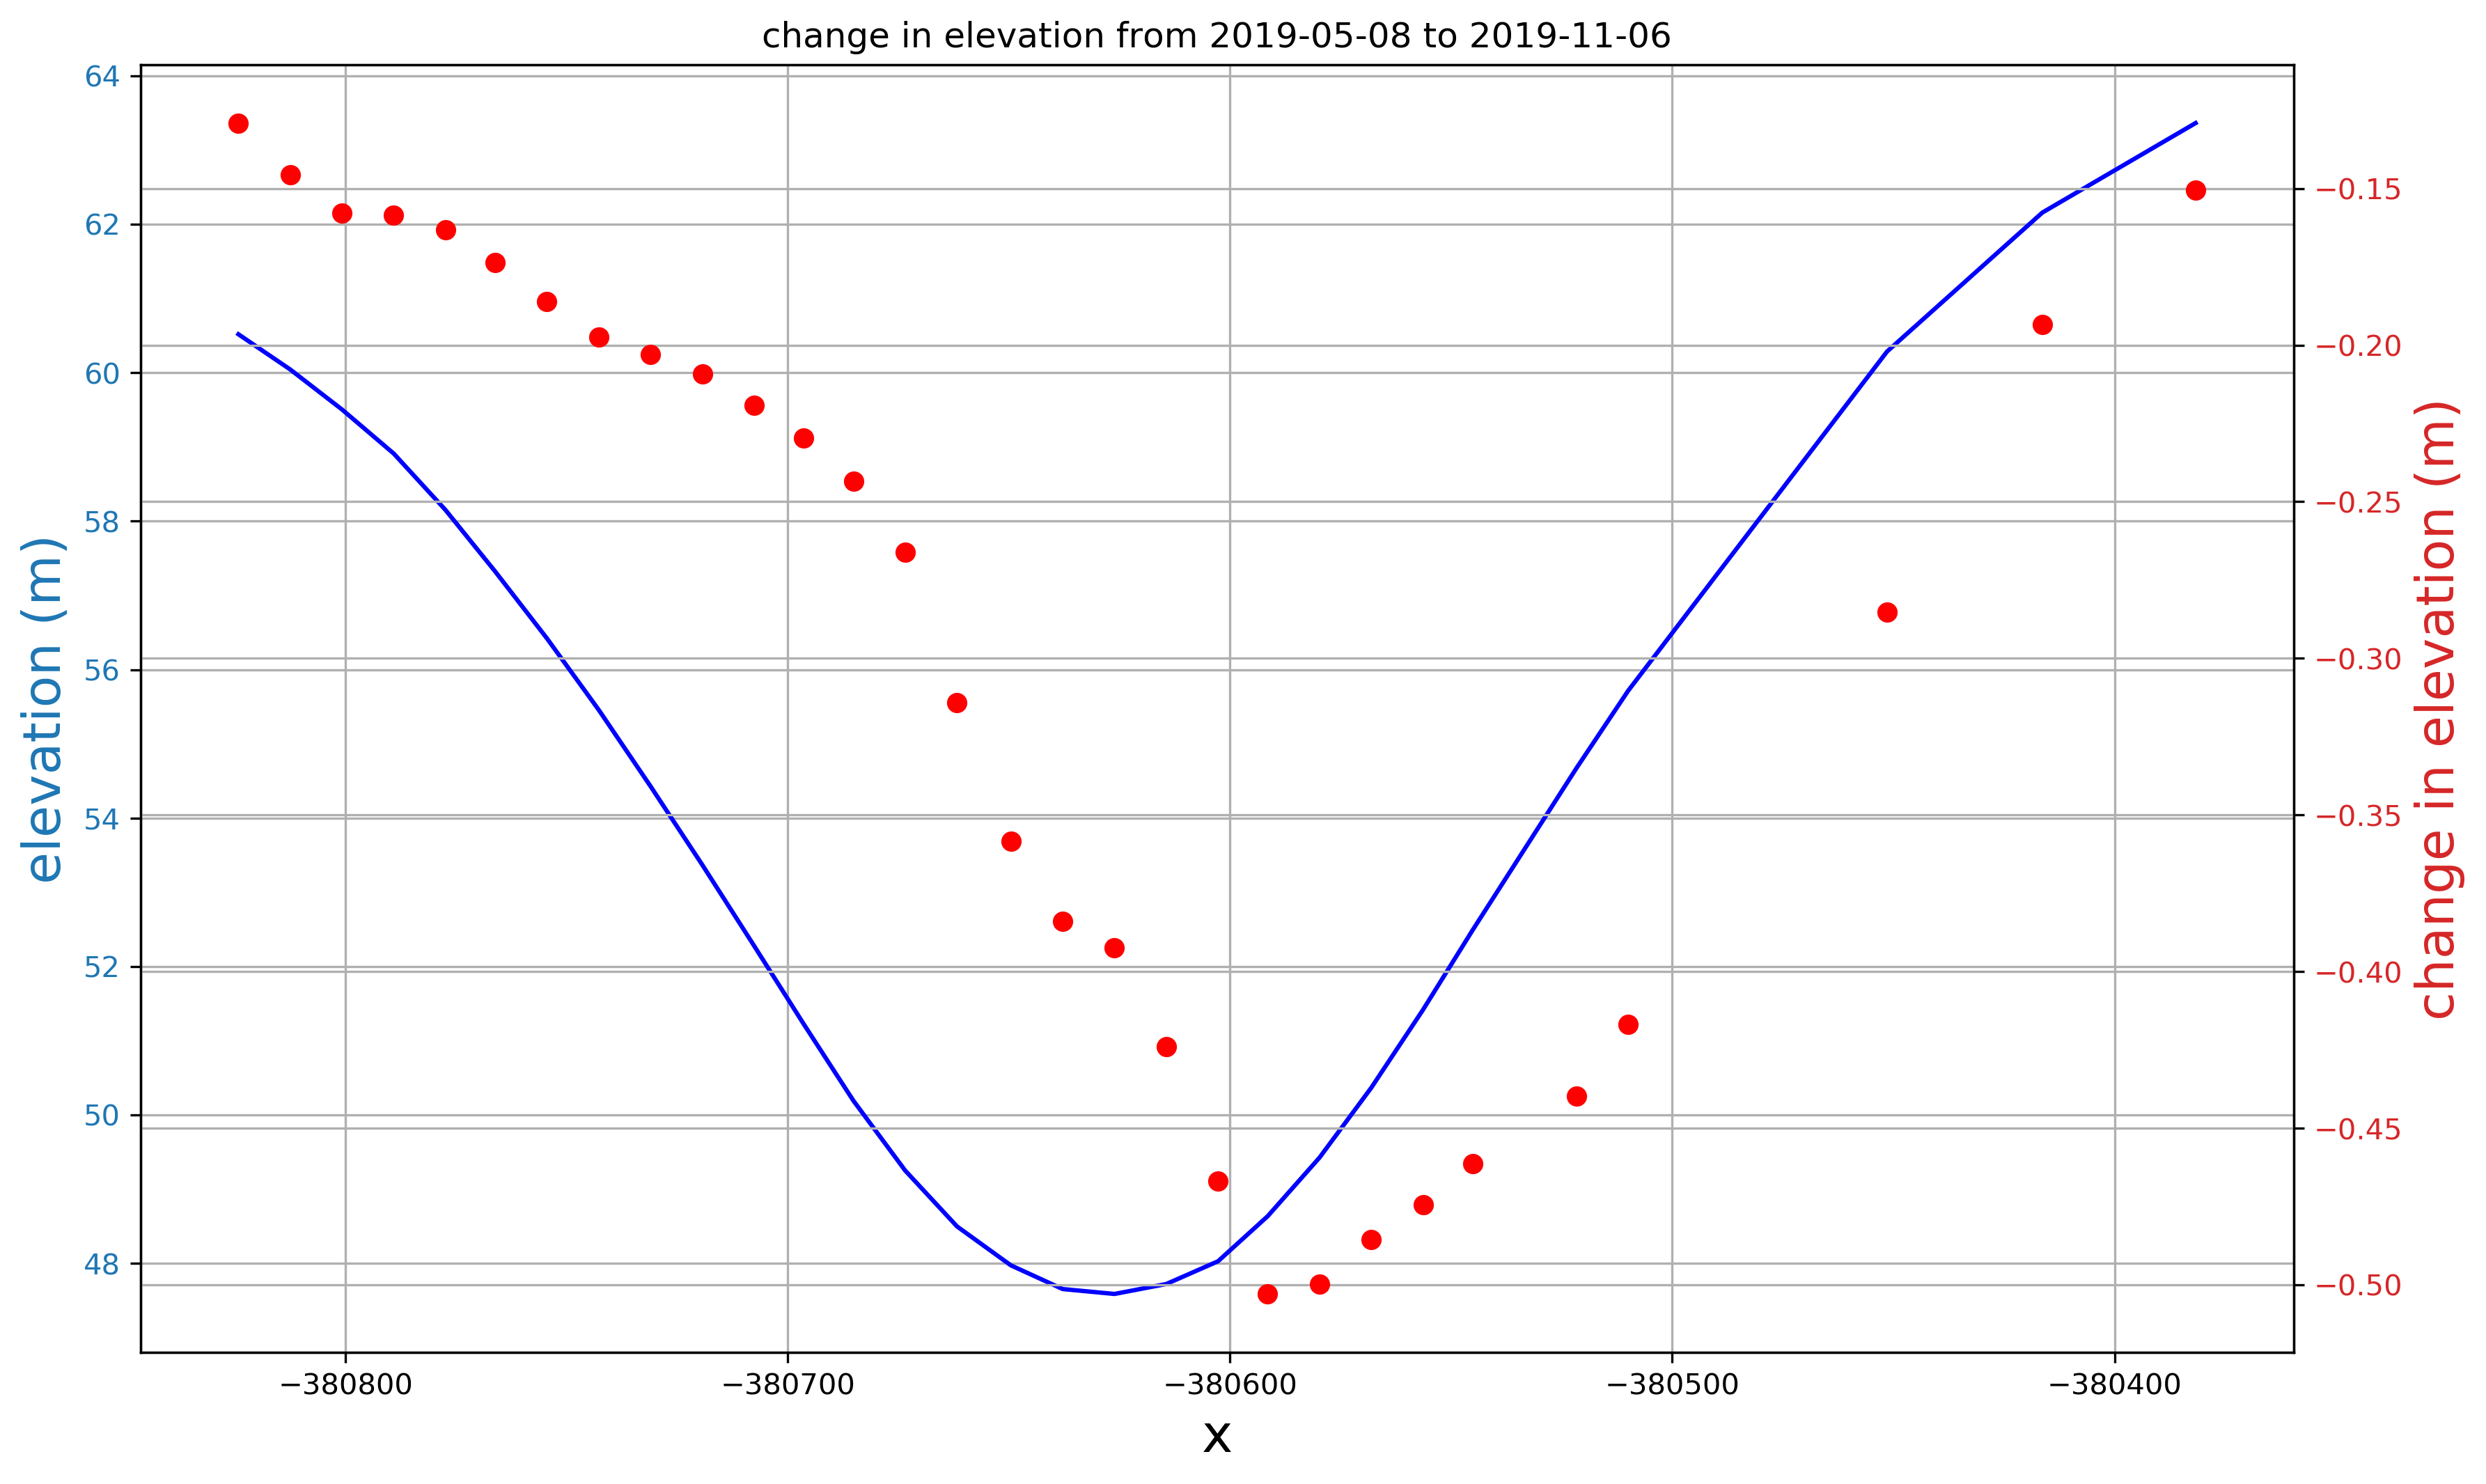

In [102]:
fig, ax1 = plt.subplots(figsize=(12,7),dpi=300)
color = 'tab:blue'
ax1.set_xlabel('x',fontsize=18)
ax1.set_ylabel('elevation (m)', color=color,fontsize=18)
ax1.plot(near_melt_5.x[ffm:ttm],near_melt_5.h_corr[ffm:ttm],'b-')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('change in elevation (m)', color=color,fontsize=18)  # we already handled the x-label with ax1
ax2.plot(dh_near_melt_area.x.iloc[fm:tm],dh_near_melt_area.h_corr.iloc[fm:tm],'ro')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f"change in elevation from {near7_3.utc_time.mean().date()} to {near7_5.utc_time.mean().date()}")
plt.show()

The above plot shows melt near line 7

### could also remove trend

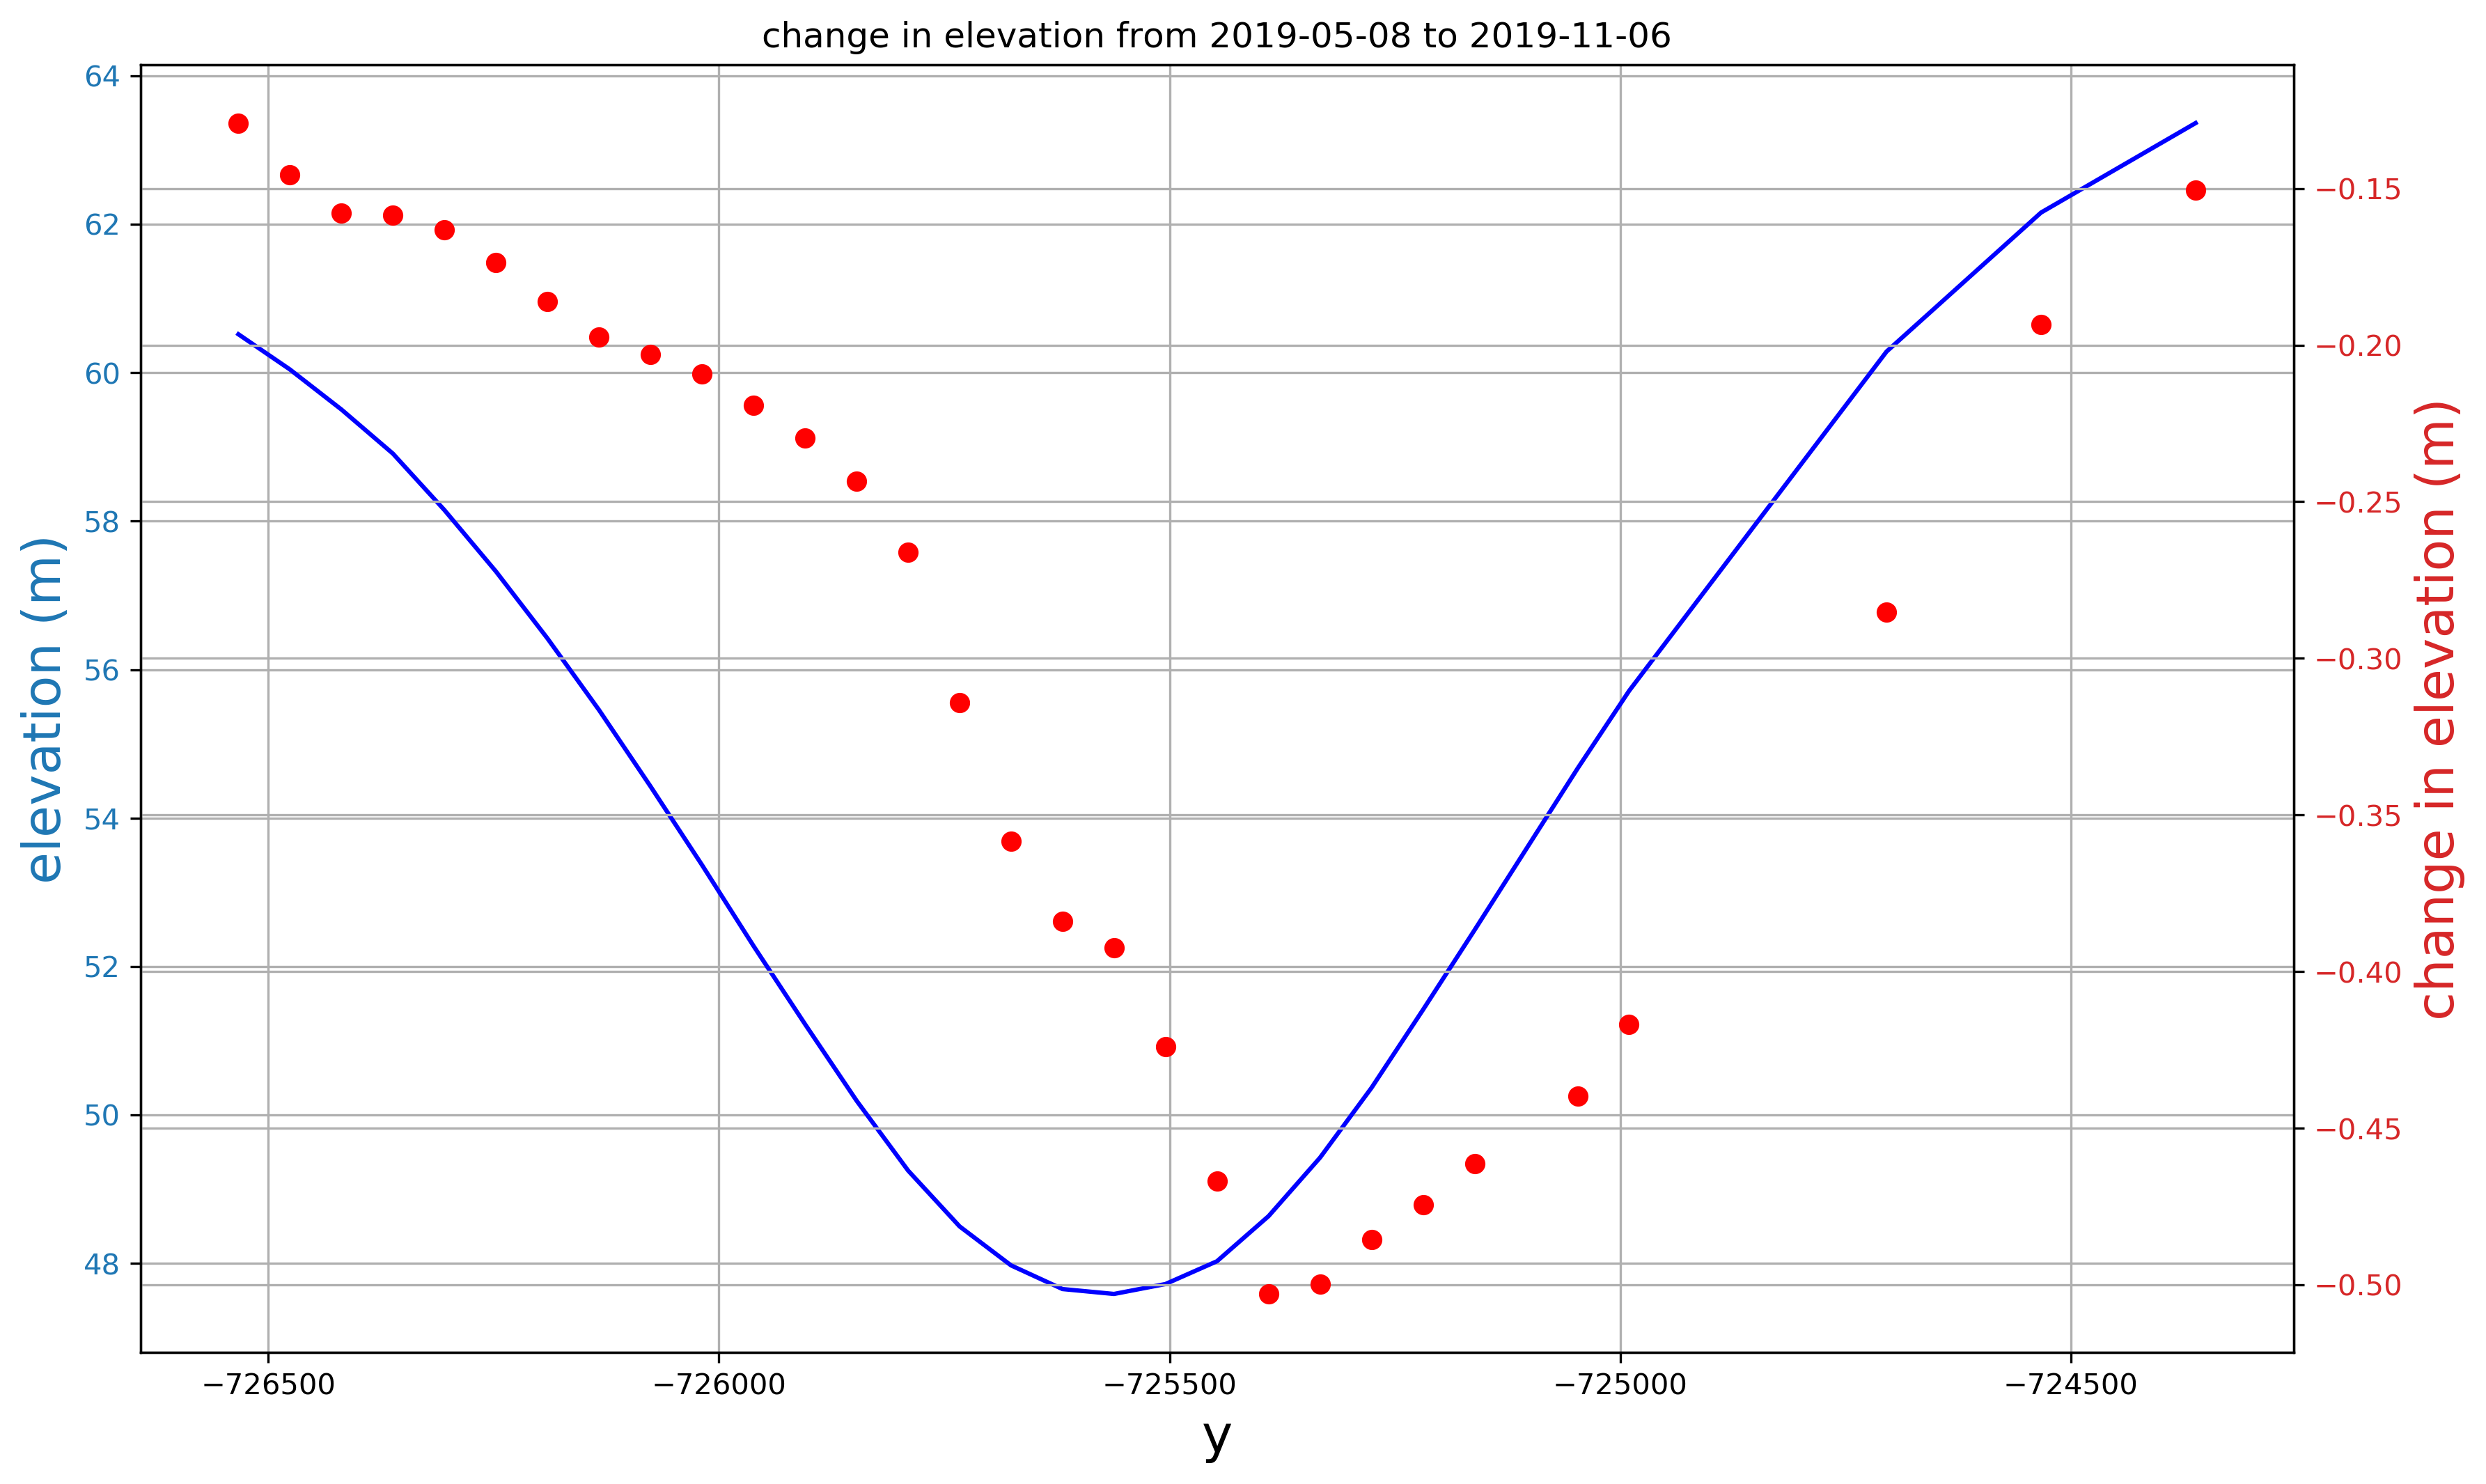

In [103]:
fig, ax1 = plt.subplots(figsize=(12,7),dpi=300)
color = 'tab:blue'
ax1.set_xlabel('y',fontsize=18)
ax1.set_ylabel('elevation (m)', color=color,fontsize=18)
ax1.plot(near_melt_5.y[ffm:ttm],near_melt_5.h_corr[ffm:ttm],'b-')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('change in elevation (m)', color=color,fontsize=18)  # we already handled the x-label with ax1
ax2.plot(dh_near_melt_area.y.iloc[fm:tm],dh_near_melt_area.h_corr.iloc[fm:tm],'ro')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f"change in elevation from {near7_3.utc_time.mean().date()} to {near7_5.utc_time.mean().date()}")
plt.show()